## Load Data, Get Representation, Train Binary Classification RNN Model
(Binary classification on log fold change)

In [48]:
%load_ext autoreload
%autoreload 2

import sys
sys.path.append("src/")
import operator
from importlib import reload
import src.preprocessing.data_loading as data_loading
import models.experiment as experiment
import models.rnn as rnn
import analysis.umap_analysis as umap
import analysis.scatter_plots as scatter_plots
import analysis.evaluation as evaluation
from preprocessing.X_representation import RAA_to_seq
from preprocessing.X_representation_utils import initialize_Proc2Vec_embeddings
from utils.utils import find_3mer
from sklearn.model_selection import KFold
from sklearn.metrics import confusion_matrix
from sklearn.utils import shuffle
import seaborn as sns
import numpy as np
from matplotlib import pyplot as plt

# reload(data_loading)
# reload(experiment)
# reload(rnn)
# reload(umap)

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## 12ca5 vs MDM2

In [54]:
R3_lib = data_loading.read_data_and_preprocess(datafile="12ca5-MDM2-mCDH2-R2.csv")
protein_of_interest = "12ca5"
other_protein = "MDM2"
X, y = data_loading.build_dataset(
    R3_lib,
    protein_of_interest=protein_of_interest,
    other_protein=other_protein,
    dataset_type=data_loading.DATASET_TYPE.JOINT_REGRESSION,
)

 - log P value cutoff is -1.0932769905470183, and log FC value cutoff is 0.9243712976268528


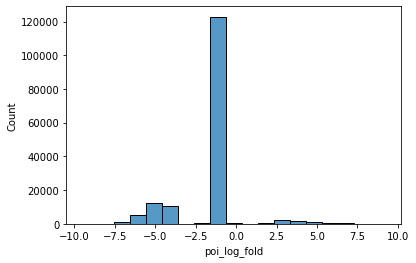

In [55]:
g=sns.histplot(R3_lib["poi_log_fold"])

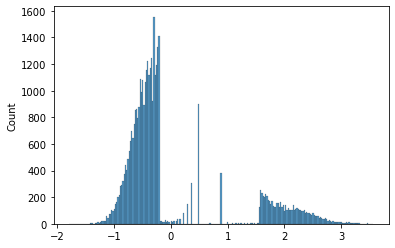

In [51]:
g=sns.histplot(y[:,1])

In [52]:
y_f_cutoff = 0.9243712976268528 
y_p_cutoff = -1.0932769905470183

In [53]:
y[:,1]= y[:,1]>y_f_cutoff
y[:,0] = y[:,0]>y_p_cutoff

result = experiment.BinaryClassificationExperiment().run_adhoc_experiment(
    X, y, rnn.Joint_BinaryClassificationRNN_gelu
)

Epoch 1/50
238/238 [==============================] - 8s 8ms/step - loss: 0.3340 - accuracy: 0.9938 - recall_1: 0.8366 - precision_1: 0.9472
Epoch 2/50
238/238 [==============================] - 2s 7ms/step - loss: 0.3005 - accuracy: 0.9823 - recall_1: 0.8454 - precision_1: 0.9617
Epoch 3/50
238/238 [==============================] - 2s 7ms/step - loss: 0.2813 - accuracy: 0.9894 - recall_1: 0.8585 - precision_1: 0.9678
Epoch 4/50
238/238 [==============================] - 2s 8ms/step - loss: 0.2773 - accuracy: 0.9882 - recall_1: 0.8592 - precision_1: 0.9690
Epoch 5/50
238/238 [==============================] - 2s 7ms/step - loss: 0.2748 - accuracy: 0.9894 - recall_1: 0.8608 - precision_1: 0.9690
Epoch 6/50
238/238 [==============================] - 2s 7ms/step - loss: 0.2731 - accuracy: 0.9881 - recall_1: 0.8626 - precision_1: 0.9690
Epoch 7/50
238/238 [==============================] - 2s 7ms/step - loss: 0.2718 - accuracy: 0.9884 - recall_1: 0.8639 - precision_1: 0.9690
Epoch 8/50
23

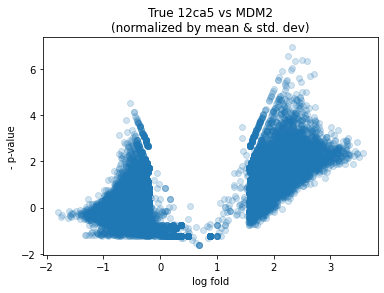

In [56]:
import matplotlib.pyplot as plt

def show_volcano(y, protein_of_interest, other_protein, title_addendum=""):
    plt.title(
        title_addendum
        + protein_of_interest
        + " vs "
        + other_protein
        + "\n(normalized by mean & std. dev)"
    )
    plt.ylabel("- p-value")
    plt.xlabel("log fold")
    plt.scatter(y[:, 1], y[:, 0], alpha=0.2)
    plt.show()

show_volcano(
    y, protein_of_interest, other_protein, title_addendum="True "
)

In [57]:
model =result.trained_model

In [58]:
X_train, X_test, y_f_train, y_f_test, y_p_train, y_p_test = scatter_plots.Kfold_sample(5, 0, X, y)

In [59]:
# evaluate accuracy, precision, recall of trianed model
evaluation.classifcation_evaluation(y_f_train, model(X_train)[:,1],y_f_cutoff)

24959 141 3826 1529
accuracy 0.8697422426530947
precision 0.9155688622754491
recall 0.28552754435107375


In [60]:
embedding=umap.embedding_classification(model,X_train)

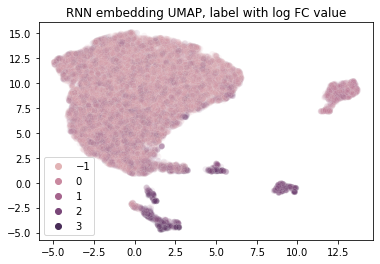

In [61]:
umap.UMAP_log_Fold(embedding, y_f_train)

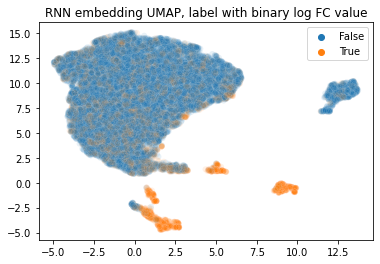

In [62]:
umap.UMAP_binary_log_Fold(embedding, y_f_train,y_f_cutoff)

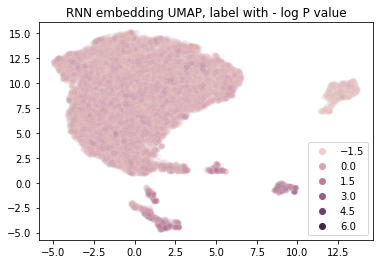

In [63]:
umap.UMAP_log_P(embedding, y_p_train)

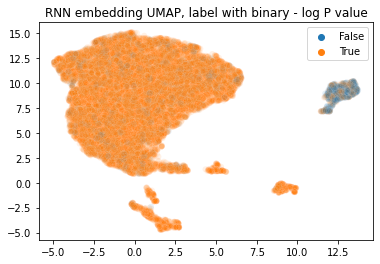

In [64]:
umap.UMAP_binary_log_P(embedding, y_p_train, y_p_cutoff)

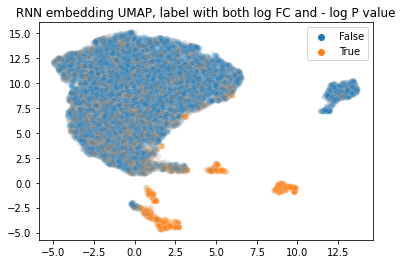

In [65]:
umap.UMAP_joint(embedding, y_f_train, y_f_cutoff, y_p_train, y_p_cutoff)

In [66]:
true_cluster = []
good_seqs = []
for i in range(len(embedding)):
    x1 = embedding[i][0]
    x2 = embedding[i][1]
    if y_f_train[i] > 0.5:
        if y_p_train[i]> 0.5:
            if x2<1 :
                true_cluster.append(X_train[i,:,1])
for feature in true_cluster:
    good_seqs.append(RAA_to_seq(feature))

In [67]:
ninemer_seq = []
for seq in good_seqs:
    if len(seq) == 9:
        ninemer_seq.append(seq[1:])

In [68]:
ninemer_seq

['CGVYAASC',
 'CRTVDGCE',
 'ACVGDYAC',
 'CLGDYAGC',
 'CWGDYACG',
 'LCFGDYSC',
 'CDYADQNC',
 'LCLGDYAC',
 'CSNPWCEE',
 'CGDYAAFC',
 'WRLVDGCE',
 'CPGDYVEC',
 'RCVWDYAC',
 'HCGDYASC',
 'GGLGDYAW',
 'NCWDYACW',
 'CVGDYACY',
 'MCWCDYAC',
 'GAADRRDY',
 'CTFTSCEE',
 'CSRTYCEE',
 'CSSTWCEE',
 'CYFSWCEE',
 'VCNSYCLE',
 'YCPDYSAC',
 'GGGDYAAC',
 'CWDYACHK',
 'CTGDYSAC',
 'CLGDYAFC',
 'GCLGDFAC',
 'CNYTYCEE',
 'NCRGDFAC',
 'CVGDYASC',
 'WAADRRDY',
 'WCWDYACY',
 'CQGDYAWC',
 'FCLGDYAW',
 'RCYGDYAC',
 'CEGDYAEC',
 'QCLGDYAC',
 'LCGDYAEC',
 'KCWDYACW',
 'MCMGDYAC',
 'CGGDYACW',
 'CFGDYAAC',
 'HCDVMDYG',
 'CSRFYDYC',
 'CDYADAYC',
 'ECNAYCRE',
 'CVGDYACT',
 'CQGDYSAC',
 'CFGDYSAC',
 'CDMVDYAC',
 'CPGDYMMC',
 'CDSWWYGC',
 'LCWGDYAW',
 'CWDYACME',
 'HCLWDVYC',
 'FCHGDYAW',
 'GCDYNFSC',
 'CDYADRRC',
 'CWDYSCWA',
 'GCLGDYAW',
 'YCRGDFAC',
 'CGETWCEE',
 'VCFGDYAC',
 'CAVDRRDY',
 'CLGDYACR',
 'ACNAYCYE',
 'RCGDYSAC',
 'CPDYAACF',
 'CPGDYASC',
 'LCQGDYAC',
 'CRATLCEE',
 'CRGYYAMC',
 'CLGDYVAC',
 'CAADRLDY',

In [69]:
import pandas as pd

In [70]:
seq9_s = pd.Series(ninemer_seq)
seq9_s=seq9_s.str.split(r'', expand=True)
seq9_s = seq9_s.drop(0,axis=1)
seq9_s = seq9_s.drop(9,axis=1)

In [71]:
seq9_s

1  2  3  4  5  6  7  8
0    C  G  V  Y  A  A  S  C
1    C  R  T  V  D  G  C  E
2    A  C  V  G  D  Y  A  C
3    C  L  G  D  Y  A  G  C
4    C  W  G  D  Y  A  C  G
..  .. .. .. .. .. .. .. ..
677  C  R  Y  Y  D  G  C  D
678  C  D  Y  A  D  K  S  C
679  C  L  G  D  Y  S  N  C
680  R  C  L  G  D  Y  A  C
681  G  C  H  Q  R  C  T  H

[682 rows x 8 columns]

In [72]:
frames=[]
for i in range(8):
  frames.append(seq9_s.iloc[:,i].value_counts().sort_index())
seq9_result = pd.concat(frames,axis=1,join='outer')

In [73]:
seq9_result

1    2    3    4      5      6    7    8
A   19   14   24   36   56.0  217.0  230    9
C  368  301    7    6    NaN  139.0  123  359
D    9   19   83  234  219.0   11.0   32   17
E   11    4    7    2    9.0    5.0   76  119
F   25   20   42   10    5.0   11.0    5    9
G   50   71  191  178    4.0   30.0   14   15
H   16    3   23    1    6.0    3.0    5    8
K   11    3    4    2    2.0    2.0    2    8
L   20   27   54    3   12.0    2.0   22    3
M   14    9   19    2    3.0    2.0   19    5
N   12   29   34    2    5.0    2.0   10    2
P    5   19    3    6    NaN    NaN    3    4
Q    4    5    5    3    2.0    2.0    8    5
R   31   47   29    2   16.0   17.0   16   25
S   18   24    8   22   24.0   42.0   55   10
T   11    9    8   49    2.0    NaN    3    8
V   22   22   42   28    2.0   10.0   17    9
W   10   26   36    7   39.0    1.0   15   39
Y   26   30   63   89  276.0  186.0   27   28

<AxesSubplot: >

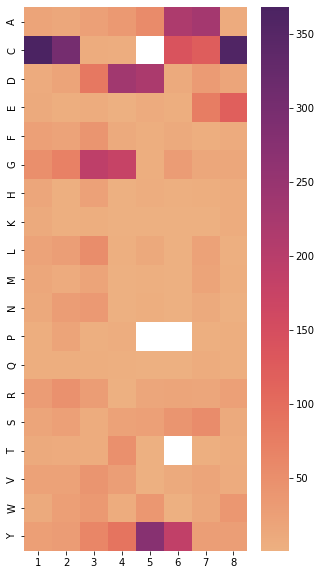

In [74]:
fig, ax = plt.subplots(figsize=(5, 10))
sns.heatmap(seq9_result, cmap=sns.color_palette("flare", as_cmap=True))

In [75]:
Dict_3mer_occ = {}
for tmer in initialize_Proc2Vec_embeddings().keys():
    tmer_good_seqs = [find_3mer(seq, tmer) for seq in good_seqs]
    tmer_occ = np.array(tmer_good_seqs).sum()
    Dict_3mer_occ[tmer] = tmer_occ

sorted_x = sorted(Dict_3mer_occ.items(), key=operator.itemgetter(1))
sorted_x[-15:]

[('AAA', array([-1.74060e-01, -9.57560e-02,  5.95150e-02,  3.96730e-02,
       -3.75934e-01, -1.15415e-01,  9.07250e-02,  1.73422e-01,
        2.92520e-01,  1.90375e-01,  9.40910e-02, -1.97482e-01,
       -1.35202e-01,  7.55210e-02,  1.10771e-01,  4.79090e-02,
       -3.91934e-01,  7.35480e-02,  1.03868e-01, -4.59240e-02,
       -9.53400e-03,  5.56590e-02, -3.08000e-04,  2.15941e-01,
        8.44760e-02,  6.15730e-02,  1.28139e-01,  1.84247e-01,
       -1.00091e-01, -1.26661e-01, -5.72800e-03, -3.82720e-02,
        1.80597e-01, -1.55310e-01,  5.62320e-02, -5.92500e-03,
       -8.53810e-02, -5.69210e-02, -4.55200e-02,  2.65116e-01,
        9.02210e-02, -2.09879e-01,  2.05381e-01,  2.36790e-02,
       -9.29390e-02,  7.27670e-02, -1.05107e-01,  1.11120e-02,
       -1.60518e-01,  4.26270e-02,  1.51230e-01, -1.62708e-01,
       -8.34790e-02, -1.46657e-01,  9.13320e-02,  1.09579e-01,
       -1.01678e-01,  9.11980e-02,  5.51200e-03,  4.73180e-02,
        7.81080e-02,  2.03824e-01, -1.00126e-0

[('LRD', 49),
 ('ACR', 51),
 ('CLG', 54),
 ('CEE', 57),
 ('LGD', 68),
 ('ACG', 74),
 ('RDY', 77),
 ('AAC', 78),
 ('PDY', 78),
 ('YAA', 79),
 ('CGD', 86),
 ('DYS', 133),
 ('YAC', 202),
 ('GDY', 367),
 ('DYA', 408)]

In [76]:
print(sorted_x[-1])
print(sorted_x[-2])
print(sorted_x[-3])
print(sorted_x[-4])
print(sorted_x[-5])

('DYA', 408)
('GDY', 367)
('YAC', 202)
('DYS', 133)
('CGD', 86)


## MDM2 vs 12ca5

In [77]:
R3_lib = data_loading.read_data_and_preprocess(datafile="12ca5-MDM2-mCDH2-R2.csv")
protein_of_interest = "MDM2"
other_protein = "12ca5"
X, y = data_loading.build_dataset(
    
    R3_lib,
    protein_of_interest=protein_of_interest,
    other_protein=other_protein,
    dataset_type=data_loading.DATASET_TYPE.JOINT_REGRESSION,
)

 - log P value cutoff is -1.0932769905470183, and log FC value cutoff is -0.9243712976268528


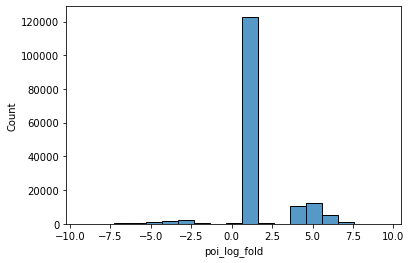

In [78]:
g=sns.histplot(R3_lib["poi_log_fold"])

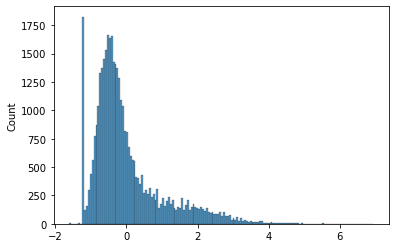

In [79]:
g=sns.histplot(y[:,0])

In [80]:
y_f_cutoff = -0.9243712976268528
y_p_cutoff = -1.0932769905470183

In [81]:
y[:,1]= y[:,1]>y_f_cutoff
y[:,0] = y[:,0]>y_p_cutoff

result = experiment.BinaryClassificationExperiment().run_adhoc_experiment(
    X, y, rnn.Joint_BinaryClassificationRNN_gelu
)

Epoch 1/50
238/238 [==============================] - 8s 8ms/step - loss: 0.3528 - accuracy: 0.9002 - recall_2: 0.9742 - precision_2: 0.8895
Epoch 2/50
238/238 [==============================] - 2s 7ms/step - loss: 0.2871 - accuracy: 0.9589 - recall_2: 0.9973 - precision_2: 0.8978
Epoch 3/50
238/238 [==============================] - 2s 8ms/step - loss: 0.2823 - accuracy: 0.9594 - recall_2: 0.9935 - precision_2: 0.9067
Epoch 4/50
238/238 [==============================] - 2s 7ms/step - loss: 0.2804 - accuracy: 0.9592 - recall_2: 0.9902 - precision_2: 0.9120
Epoch 5/50
238/238 [==============================] - 2s 6ms/step - loss: 0.2782 - accuracy: 0.9594 - recall_2: 0.9902 - precision_2: 0.9128
Epoch 6/50
238/238 [==============================] - 1s 6ms/step - loss: 0.2761 - accuracy: 0.9593 - recall_2: 0.9901 - precision_2: 0.9137
Epoch 7/50
238/238 [==============================] - 1s 6ms/step - loss: 0.2740 - accuracy: 0.9593 - recall_2: 0.9895 - precision_2: 0.9151
Epoch 8/50
23

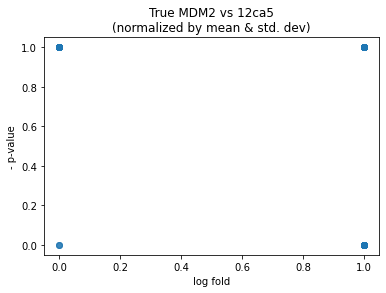

In [82]:
import matplotlib.pyplot as plt

def show_volcano(y, protein_of_interest, other_protein, title_addendum=""):
    plt.title(
        title_addendum
        + protein_of_interest
        + " vs "
        + other_protein
        + "\n(normalized by mean & std. dev)"
    )
    plt.ylabel("- p-value")
    plt.xlabel("log fold")
    plt.scatter(y[:, 1], y[:, 0], alpha=0.2)
    plt.show()

show_volcano(
    y, protein_of_interest, other_protein, title_addendum="True "
)

In [83]:
model =result.trained_model

In [84]:
X_train, X_test, y_f_train, y_f_test, y_p_train, y_p_test = scatter_plots.Kfold_sample(5, 0, X, y)

In [85]:
# evaluate accuracy, precision, recall of trianed model
evaluation.classifcation_evaluation(y_f_train, model(X_train)[:,1],y_f_cutoff)

0 0 1509 28946
accuracy 0.9504514857987194
precision 1.0
recall 0.9504514857987194


In [86]:
embedding=umap.embedding_classification(model,X_train)

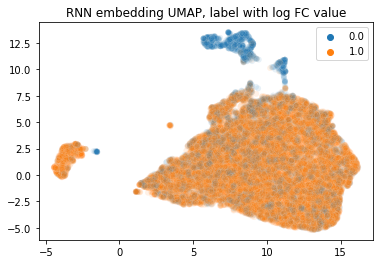

In [87]:
umap.UMAP_log_Fold(embedding, y_f_train)

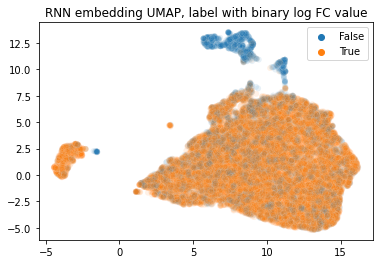

In [88]:
umap.UMAP_binary_log_Fold(embedding, y_f_train,0.5)

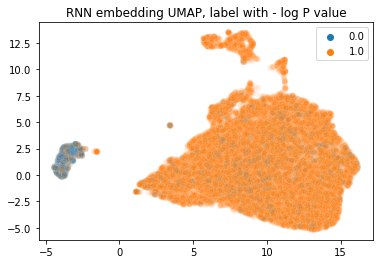

In [89]:
umap.UMAP_log_P(embedding, y_p_train)

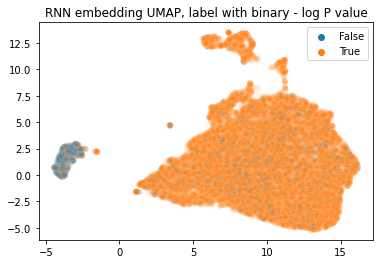

In [90]:
umap.UMAP_binary_log_P(embedding, y_p_train, 0.5)

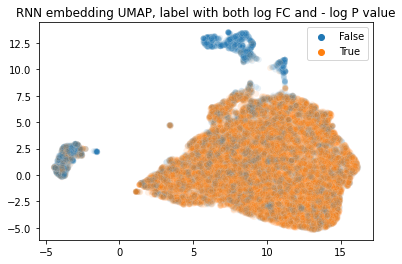

In [91]:
umap.UMAP_joint(embedding, y_f_train, 0.5, y_p_train, 0.5)

In [92]:
true_cluster = []
good_seqs = []
for i in range(len(embedding)):
    x1 = embedding[i][0]
    x2 = embedding[i][1]
    if y_f_train[i] > y_f_cutoff:
        if y_p_train[i]> y_p_cutoff:
            if x1 >0 and x2<7.5 :
                true_cluster.append(X_train[i,:,1])
for feature in true_cluster:
    good_seqs.append(RAA_to_seq(feature))

In [93]:
ninemer_seq = []
for seq in good_seqs:
    if len(seq) == 9:
        ninemer_seq.append(seq[1:])

In [94]:
ninemer_seq

['YCGPNKCM',
 'PCHAMFCT',
 'CWNYETCW',
 'GCYPRLCN',
 'VCHLVWCQ',
 'CQNFTCVA',
 'RCDGLCRF',
 'HCLTGLCY',
 'NCFGFDCL',
 'ACGFWSSC',
 'CRWMSDCW',
 'RCTLEVCT',
 'CTEASCRT',
 'CYLVWCNH',
 'CASMCARC',
 'GCNNLCVY',
 'NCHRHQGC',
 'CRTLMCYS',
 'PCSLYYCT',
 'PCQARYCY',
 'LCDNSYYC',
 'CSWLFCRT',
 'CGSLKMCG',
 'CLQKPYRC',
 'CLGLYAVC',
 'CPARYSAC',
 'CGSHYCSF',
 'CVSAFERC',
 'CSAYTDCV',
 'CLYNKRLC',
 'CDRRWEPC',
 'CHMAVYCG',
 'KCCSFNGC',
 'CKYNNTVC',
 'CVDRFCWW',
 'CSRDVYTC',
 'CRSEVSSC',
 'HCFNGVCM',
 'CVMNSYCR',
 'HCDFDCAM',
 'CYRLSCGL',
 'LCRAGSNC',
 'CGYGRGCY',
 'SCWPKSCS',
 'CGVSPNCA',
 'SCAVHYSC',
 'CLNRLCWS',
 'CVRDTCYT',
 'CNYEYRFC',
 'LCYTQYCV',
 'CELTYGRC',
 'CLVGKQDC',
 'PCLDRCVG',
 'ACQSRACL',
 'CTWLLCTP',
 'CHPTVHCQ',
 'CSFVDGWC',
 'CRSYASCD',
 'SCSRFCGP',
 'CYDSRCMH',
 'WCLDYGCP',
 'CKSYSWGC',
 'CLGPYVAC',
 'CFSTLCLY',
 'ECYTGCPS',
 'VCGEYTSC',
 'QCFPACGY',
 'HCSPYKMC',
 'ECTAVYCW',
 'CRDPRMSC',
 'VCWNYGCV',
 'TCDSRCYN',
 'CDRYWGNC',
 'CQEWYTSC',
 'SCRDFGCK',
 'CSSYVSCV',
 'PCYDRVCR',

In [95]:
import pandas as pd

In [96]:
seq9_s = pd.Series(ninemer_seq)
seq9_s=seq9_s.str.split(r'', expand=True)
seq9_s = seq9_s.drop(0,axis=1)
seq9_s = seq9_s.drop(9,axis=1)

In [97]:
seq9_s

1  2  3  4  5  6  7  8
0      Y  C  G  P  N  K  C  M
1      P  C  H  A  M  F  C  T
2      C  W  N  Y  E  T  C  W
3      G  C  Y  P  R  L  C  N
4      V  C  H  L  V  W  C  Q
...   .. .. .. .. .. .. .. ..
27252  N  C  G  F  L  W  G  C
27253  C  F  G  Y  L  C  S  G
27254  C  F  G  S  W  G  C  V
27255  C  K  S  N  Y  L  C  L
27256  C  P  A  N  R  C  S  W

[27257 rows x 8 columns]

In [100]:
frames=[]
for i in range(8):
    frames.append(seq9_s.iloc[:,i].value_counts().sort_index())
seq9_result = pd.concat(frames,axis=1,join='outer')

In [101]:
seq9_result

1      2     3     4     5     6     7     8
A    863    448  1435  1751  1715  1115  1086  1140
C  14478  12845   129    49    79  8956  9589  8873
D    518    677  1168  1107  1086   630   573   559
E    392    457   748   751   781   475   364   397
F    452    701  1214  1434  1306   927   759   814
G   1240   1446  3006  2739  2659  1558  1561  1382
H    416    578  1044  1038  1026   722   701   731
K    397    447   922   923   866   564   662   678
L   1202   1335  2391  2262  2308  1660  1689  1712
M    506    534   786   753   967   643   635   667
N    607    729  1299  1335  1244   817   801   703
P    629    557  1205  1234  1184   755   657   782
Q    345    402   607   668   748   501   510   539
R    445    647  1560  1847  1965  1515  1502  1766
S   1595   1797  3315  3237  3185  2137  1960  2010
T    754    844  1632  1441  1462  1004   924   975
V   1284   1164  1912  1711  1744  1231  1309  1474
W    248    586  1041  1067  1094   758   699   630
Y    886   1063  1843  1910  1838  1289  1276  1425

<AxesSubplot: >

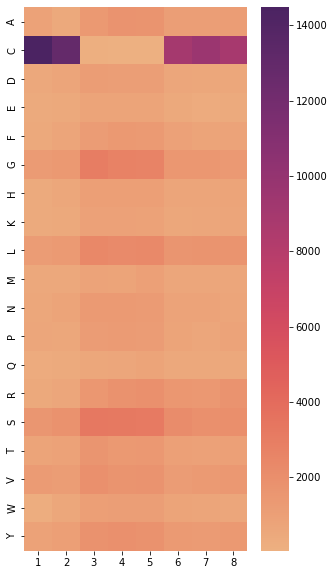

In [102]:
fig, ax = plt.subplots(figsize=(5, 10))
sns.heatmap(seq9_result, cmap=sns.color_palette("flare", as_cmap=True))

In [103]:
Dict_3mer_occ = {}
for tmer in initialize_Proc2Vec_embeddings().keys():
    tmer_good_seqs = [find_3mer(seq, tmer) for seq in good_seqs]
    tmer_occ = np.array(tmer_good_seqs).sum()
    Dict_3mer_occ[tmer] = tmer_occ

sorted_x = sorted(Dict_3mer_occ.items(), key=operator.itemgetter(1))
sorted_x[-15:]

[('AAA', array([-1.74060e-01, -9.57560e-02,  5.95150e-02,  3.96730e-02,
       -3.75934e-01, -1.15415e-01,  9.07250e-02,  1.73422e-01,
        2.92520e-01,  1.90375e-01,  9.40910e-02, -1.97482e-01,
       -1.35202e-01,  7.55210e-02,  1.10771e-01,  4.79090e-02,
       -3.91934e-01,  7.35480e-02,  1.03868e-01, -4.59240e-02,
       -9.53400e-03,  5.56590e-02, -3.08000e-04,  2.15941e-01,
        8.44760e-02,  6.15730e-02,  1.28139e-01,  1.84247e-01,
       -1.00091e-01, -1.26661e-01, -5.72800e-03, -3.82720e-02,
        1.80597e-01, -1.55310e-01,  5.62320e-02, -5.92500e-03,
       -8.53810e-02, -5.69210e-02, -4.55200e-02,  2.65116e-01,
        9.02210e-02, -2.09879e-01,  2.05381e-01,  2.36790e-02,
       -9.29390e-02,  7.27670e-02, -1.05107e-01,  1.11120e-02,
       -1.60518e-01,  4.26270e-02,  1.51230e-01, -1.62708e-01,
       -8.34790e-02, -1.46657e-01,  9.13320e-02,  1.09579e-01,
       -1.01678e-01,  9.11980e-02,  5.51200e-03,  4.73180e-02,
        7.81080e-02,  2.03824e-01, -1.00126e-0

[('ACR', 812),
 ('ATC', 828),
 ('ACN', 850),
 ('AAC', 957),
 ('ACT', 1003),
 ('AYC', 1014),
 ('ACY', 1242),
 ('ACV', 1313),
 ('ALC', 1332),
 ('AGC', 1381),
 ('AVC', 1396),
 ('ACL', 1532),
 ('ACG', 1642),
 ('ASC', 1795),
 ('ACS', 2024)]

In [104]:
print(sorted_x[-1])
print(sorted_x[-2])
print(sorted_x[-3])
print(sorted_x[-4])
print(sorted_x[-5])

('ACS', 2024)
('ASC', 1795)
('ACG', 1642)
('ACL', 1532)
('AVC', 1396)


## MDM2 vs mCDH2

In [105]:
R3_lib = data_loading.read_data_and_preprocess(datafile="12ca5-MDM2-mCDH2-R2.csv")
protein_of_interest = "MDM2"
other_protein = "mCDH2"
X, y = data_loading.build_dataset(
    R3_lib,
    protein_of_interest=protein_of_interest,
    other_protein=other_protein,
    dataset_type=data_loading.DATASET_TYPE.JOINT_REGRESSION,
)

 - log P value cutoff is -0.692701488333345, and log FC value cutoff is 0.3400935039265702


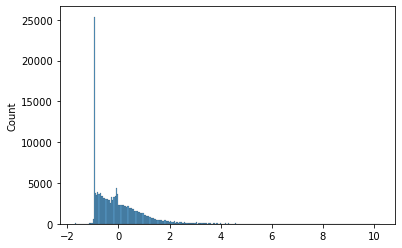

In [106]:
g=sns.histplot(y[:,0])

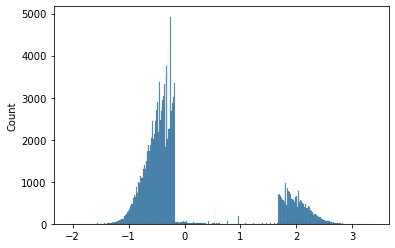

In [107]:
g=sns.histplot(y[:,1])

In [108]:
y_f_cutoff = 0.3400935039265702
y_p_cutoff = -0.692701488333345

In [109]:
y[:,1]= y[:,1]>y_f_cutoff
y[:,0] = y[:,0]>y_p_cutoff

result = experiment.BinaryClassificationExperiment().run_adhoc_experiment(
    X, y, rnn.Joint_BinaryClassificationRNN_gelu
)

Epoch 1/50
964/964 [==============================] - 12s 8ms/step - loss: 0.5156 - accuracy: 0.9912 - recall_3: 0.7807 - precision_3: 0.7527
Epoch 2/50
964/964 [==============================] - 7s 7ms/step - loss: 0.5040 - accuracy: 0.9557 - recall_3: 0.7802 - precision_3: 0.7613
Epoch 3/50
964/964 [==============================] - 6s 6ms/step - loss: 0.5036 - accuracy: 0.9392 - recall_3: 0.7802 - precision_3: 0.7614
Epoch 4/50
964/964 [==============================] - 7s 7ms/step - loss: 0.5033 - accuracy: 0.9257 - recall_3: 0.7803 - precision_3: 0.7614
Epoch 5/50
964/964 [==============================] - 6s 6ms/step - loss: 0.5031 - accuracy: 0.9331 - recall_3: 0.7802 - precision_3: 0.7615
Epoch 6/50
964/964 [==============================] - 5s 6ms/step - loss: 0.5029 - accuracy: 0.9326 - recall_3: 0.7801 - precision_3: 0.7616
Epoch 7/50
964/964 [==============================] - 5s 6ms/step - loss: 0.5027 - accuracy: 0.9340 - recall_3: 0.7801 - precision_3: 0.7618
Epoch 8/50
9

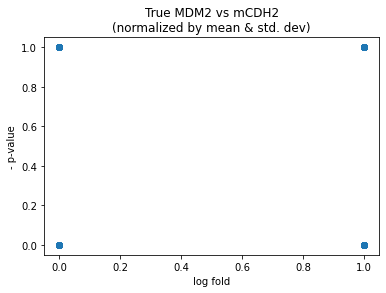

In [110]:
import matplotlib.pyplot as plt

def show_volcano(y, protein_of_interest, other_protein, title_addendum=""):
    plt.title(
        title_addendum
        + protein_of_interest
        + " vs "
        + other_protein
        + "\n(normalized by mean & std. dev)"
    )
    plt.ylabel("- p-value")
    plt.xlabel("log fold")
    plt.scatter(y[:, 1], y[:, 0], alpha=0.2)
    plt.show()

show_volcano(
    y, protein_of_interest, other_protein, title_addendum="True "
)

In [111]:
model =result.trained_model

In [112]:
X_train, X_test, y_f_train, y_f_test, y_p_train, y_p_test = scatter_plots.Kfold_sample(5, 0, X, y)

In [113]:
# evaluate accuracy, precision, recall of trianed model
evaluation.classifcation_evaluation(y_f_train, model(X_train)[:,1],y_f_cutoff)

99161 31 23934 178
accuracy 0.8056429637319146
precision 0.8516746411483254
recall 0.007382216323822163


In [114]:
embedding=umap.embedding_classification(model,X_train)

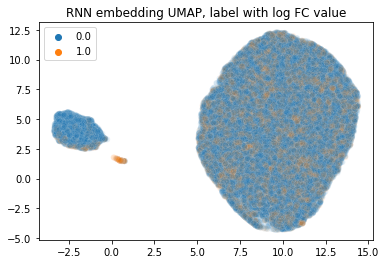

In [115]:
umap.UMAP_log_Fold(embedding, y_f_train)

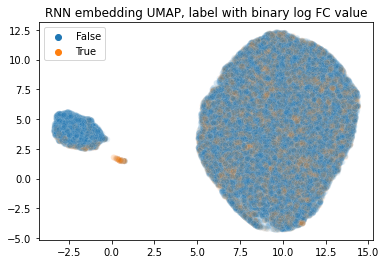

In [116]:
umap.UMAP_binary_log_Fold(embedding, y_f_train,0.5)

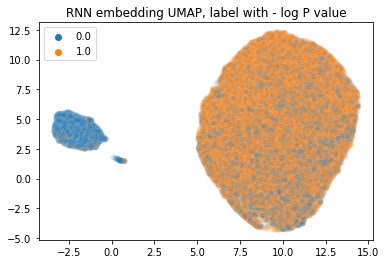

In [117]:
umap.UMAP_log_P(embedding, y_p_train)

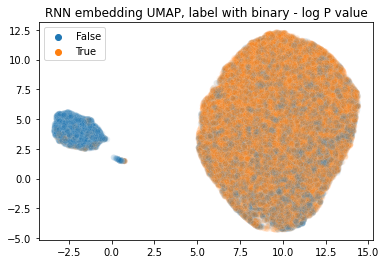

In [118]:
umap.UMAP_binary_log_P(embedding, y_p_train, 0.5)

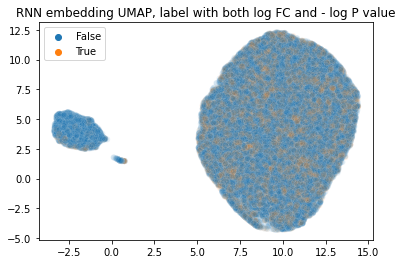

In [119]:
umap.UMAP_joint(embedding, y_f_train, 0.5, y_p_train, 0.5)

In [123]:
true_cluster = []
good_seqs = []
for i in range(len(embedding)):
    x1 = embedding[i][0]
    x2 = embedding[i][1]
    if y_f_train[i] >0.5:
        if y_p_train[i]> 0.5:
            if x1>5:
                true_cluster.append(X_train[i,:,1])
for feature in true_cluster:
    good_seqs.append(RAA_to_seq(feature))

In [124]:
ninemer_seq = []
for seq in good_seqs:
    if len(seq) == 9:
        ninemer_seq.append(seq[1:])

In [125]:
ninemer_seq

['VCLRGTCW',
 'CYSRYCWQ',
 'CFYVRDVC',
 'RCYGVLCA',
 'ACYWSTGC',
 'CDALKCKY',
 'ECRTKGCG',
 'CRASVCAS',
 'CYSSYCEL',
 'VCLLGNCS',
 'LCSQGYKC',
 'SCHVSKCS',
 'CLSKLCLM',
 'CERSSCRS',
 'CVDNLVCY',
 'CVAREAAC',
 'CNEFRCWY',
 'CSLFKTDC',
 'CGYYLRPC',
 'CSTVACRA',
 'CNLKSWCL',
 'CELWSCAL',
 'CALTGFCF',
 'NCTEGSCF',
 'CYSLFCRV',
 'LCSFSNRC',
 'VCPRDVLC',
 'DCRRGFAC',
 'CTSDKACP',
 'ECSLTSYC',
 'CNALRLCS',
 'CCGGRCVC',
 'CGTGVTSC',
 'CWPKLCAT',
 'CEFYTGCL',
 'TCTARHCW',
 'ECMSNLTC',
 'CPFNGCSM',
 'CMSSYGTC',
 'CSGQWCGY',
 'ACGKGCGY',
 'CGLLGACS',
 'CVPNRCVG',
 'CNWSNCAM',
 'CANGSCRS',
 'CTHLPCGV',
 'CRQYNCHT',
 'KCLVPCYA',
 'VCNAMMAC',
 'LCRNYLCN',
 'CDLGYCHS',
 'CHLRYCQG',
 'CSYRSCPA',
 'CSDLKLGC',
 'SCGSRAAC',
 'CGLGHCAE',
 'CLDRQHCN',
 'VCVSDGCA',
 'VCLNTGCD',
 'CLSLFCRM',
 'CLAAACTQ',
 'GCLFTVCE',
 'CGPSASCS',
 'FCATDRWC',
 'CFHRWCKQ',
 'ACGVLCYA',
 'GCEQLCQS',
 'CVLPECTV',
 'SCHRMSVC',
 'CEDFGACF',
 'CVPLGCWP',
 'CYDTYCFF',
 'CSYKNAHC',
 'SCSEDHVC',
 'CSGSVSCR',
 'PCVHRVMC',
 'CMATSHCH',

In [126]:
import pandas as pd

In [127]:
seq9_s = pd.Series(ninemer_seq)
seq9_s=seq9_s.str.split(r'', expand=True)
seq9_s = seq9_s.drop(0,axis=1)
seq9_s = seq9_s.drop(9,axis=1)

In [128]:
seq9_s

1  2  3  4  5  6  7  8
0      V  C  L  R  G  T  C  W
1      C  Y  S  R  Y  C  W  Q
2      C  F  Y  V  R  D  V  C
3      R  C  Y  G  V  L  C  A
4      A  C  Y  W  S  T  G  C
...   .. .. .. .. .. .. .. ..
22701  W  C  N  Q  G  H  N  C
22702  C  F  N  Y  L  P  Q  C
22703  C  M  N  F  Y  C  S  D
22704  C  K  A  S  S  S  C  Y
22705  C  K  V  V  G  Q  C  T

[22706 rows x 8 columns]

In [129]:
frames=[]
for i in range(8):
  frames.append(seq9_s.iloc[:,i].value_counts().sort_index())
seq9_result = pd.concat(frames,axis=1,join='outer')

In [130]:
seq9_result

1      2     3     4     5     6     7     8
A    735    363  1218  1446  1415   950   944   939
C  12066  10695   109    36    73  7453  8024  7354
D    429    566   990   962   921   500   464   452
E    309    374   613   620   668   361   299   323
F    378    575  1018  1197  1080   776   659   725
G   1041   1137  2520  2313  2165  1304  1269  1110
H    330    448   840   816   788   585   559   567
K    332    365   767   785   723   487   547   573
L   1002   1107  1991  1871  1920  1348  1401  1438
M    435    480   673   648   789   516   538   576
N    495    626  1083  1106  1010   674   662   597
P    540    477  1006  1010   951   636   535   649
Q    297    334   487   555   596   434   409   442
R    371    549  1256  1530  1665  1264  1228  1491
S   1316   1499  2758  2716  2656  1813  1620  1647
T    628    726  1357  1177  1269   829   776   821
V   1041    984  1636  1433  1464  1017  1095  1255
W    199    478   851   868   943   676   590   540
Y    762    923  1533  1617  1610  1083  1087  1207

<AxesSubplot: >

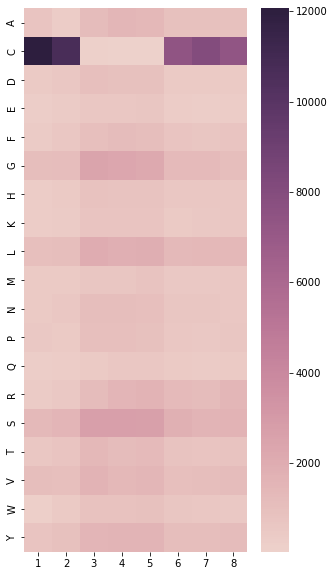

In [131]:
fig, ax = plt.subplots(figsize=(5, 10))
sns.heatmap(seq9_result, cmap=sns.cubehelix_palette(as_cmap=True))

In [132]:
Dict_3mer_occ = {}
for tmer in initialize_Proc2Vec_embeddings().keys():
    tmer_good_seqs = [find_3mer(seq, tmer) for seq in good_seqs]
    tmer_occ = np.array(tmer_good_seqs).sum()
    Dict_3mer_occ[tmer] = tmer_occ

sorted_x = sorted(Dict_3mer_occ.items(), key=operator.itemgetter(1))
sorted_x[-15:]

[('AAA', array([-1.74060e-01, -9.57560e-02,  5.95150e-02,  3.96730e-02,
       -3.75934e-01, -1.15415e-01,  9.07250e-02,  1.73422e-01,
        2.92520e-01,  1.90375e-01,  9.40910e-02, -1.97482e-01,
       -1.35202e-01,  7.55210e-02,  1.10771e-01,  4.79090e-02,
       -3.91934e-01,  7.35480e-02,  1.03868e-01, -4.59240e-02,
       -9.53400e-03,  5.56590e-02, -3.08000e-04,  2.15941e-01,
        8.44760e-02,  6.15730e-02,  1.28139e-01,  1.84247e-01,
       -1.00091e-01, -1.26661e-01, -5.72800e-03, -3.82720e-02,
        1.80597e-01, -1.55310e-01,  5.62320e-02, -5.92500e-03,
       -8.53810e-02, -5.69210e-02, -4.55200e-02,  2.65116e-01,
        9.02210e-02, -2.09879e-01,  2.05381e-01,  2.36790e-02,
       -9.29390e-02,  7.27670e-02, -1.05107e-01,  1.11120e-02,
       -1.60518e-01,  4.26270e-02,  1.51230e-01, -1.62708e-01,
       -8.34790e-02, -1.46657e-01,  9.13320e-02,  1.09579e-01,
       -1.01678e-01,  9.11980e-02,  5.51200e-03,  4.73180e-02,
        7.81080e-02,  2.03824e-01, -1.00126e-0

[('ACR', 681),
 ('ATC', 697),
 ('ACN', 734),
 ('AAC', 812),
 ('ACT', 848),
 ('AYC', 872),
 ('ACY', 1070),
 ('ALC', 1116),
 ('ACV', 1119),
 ('AVC', 1135),
 ('AGC', 1143),
 ('ACL', 1281),
 ('ACG', 1293),
 ('ASC', 1482),
 ('ACS', 1700)]

In [133]:
print(sorted_x[-1])
print(sorted_x[-2])
print(sorted_x[-3])
print(sorted_x[-4])
print(sorted_x[-5])

('ACS', 1700)
('ASC', 1482)
('ACG', 1293)
('ACL', 1281)
('AGC', 1143)


## mCDH2 vs MDM2

In [135]:
R3_lib = data_loading.read_data_and_preprocess(datafile="12ca5-MDM2-mCDH2-R2.csv")
protein_of_interest = "mCDH2"
other_protein = "MDM2"
X, y = data_loading.build_dataset(
    R3_lib,
    protein_of_interest=protein_of_interest,
    other_protein=other_protein,
    dataset_type=data_loading.DATASET_TYPE.JOINT_REGRESSION,
)

 - log P value cutoff is -0.692701488333345, and log FC value cutoff is -0.3400935039265702


In [136]:
y_f_cutoff = -0.04394247826022299
y_p_cutoff = -0.08396512191297816

In [137]:
y[:,1]= y[:,1]>y_f_cutoff
y[:,0] = y[:,0]>y_p_cutoff

result = experiment.BinaryClassificationExperiment().run_adhoc_experiment(
    X, y, rnn.Joint_BinaryClassificationRNN_gelu
)

Epoch 1/50
964/964 [==============================] - 18s 9ms/step - loss: 0.5756 - accuracy: 0.5286 - recall_4: 0.7288 - precision_4: 0.7546
Epoch 2/50
964/964 [==============================] - 7s 7ms/step - loss: 0.5715 - accuracy: 0.5286 - recall_4: 0.7720 - precision_4: 0.7383
Epoch 3/50
964/964 [==============================] - 7s 7ms/step - loss: 0.5709 - accuracy: 0.5286 - recall_4: 0.7737 - precision_4: 0.7385
Epoch 4/50
964/964 [==============================] - 6s 6ms/step - loss: 0.5706 - accuracy: 0.5286 - recall_4: 0.7752 - precision_4: 0.7387
Epoch 5/50
964/964 [==============================] - 7s 7ms/step - loss: 0.5704 - accuracy: 0.5286 - recall_4: 0.7732 - precision_4: 0.7397
Epoch 6/50
964/964 [==============================] - 7s 7ms/step - loss: 0.5703 - accuracy: 0.5286 - recall_4: 0.7718 - precision_4: 0.7404
Epoch 7/50
964/964 [==============================] - 7s 7ms/step - loss: 0.5701 - accuracy: 0.5286 - recall_4: 0.7715 - precision_4: 0.7406
Epoch 8/50
9

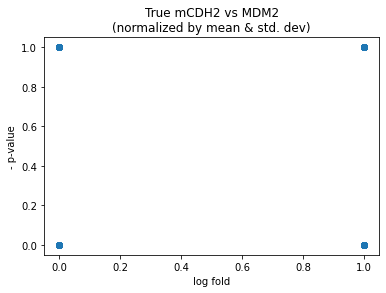

In [138]:
import matplotlib.pyplot as plt

def show_volcano(y, protein_of_interest, other_protein, title_addendum=""):
    plt.title(
        title_addendum
        + protein_of_interest
        + " vs "
        + other_protein
        + "\n(normalized by mean & std. dev)"
    )
    plt.ylabel("- p-value")
    plt.xlabel("log fold")
    plt.scatter(y[:, 1], y[:, 0], alpha=0.2)
    plt.show()

show_volcano(
    y, protein_of_interest, other_protein, title_addendum="True "
)

In [139]:
model =result.trained_model

In [140]:
X_train, X_test, y_f_train, y_f_test, y_p_train, y_p_test = scatter_plots.Kfold_sample(5, 0, X, y)

In [141]:
# evaluate accuracy, precision, recall of trianed model
evaluation.classifcation_evaluation(y_f_train, model(X_train)[:,1],y_f_cutoff)

0 0 472 122832
accuracy 0.9961720625446052
precision 1.0
recall 0.9961720625446052


In [142]:
embedding=umap.embedding_classification(model,X_train)

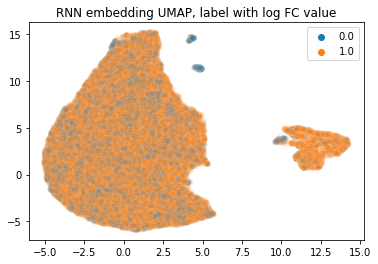

In [143]:
umap.UMAP_log_Fold(embedding, y_f_train)

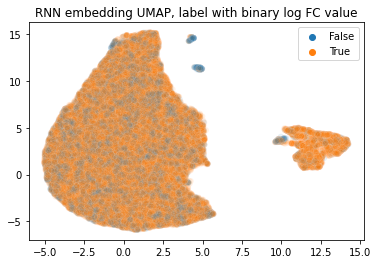

In [144]:
umap.UMAP_binary_log_Fold(embedding, y_f_train,0.5)

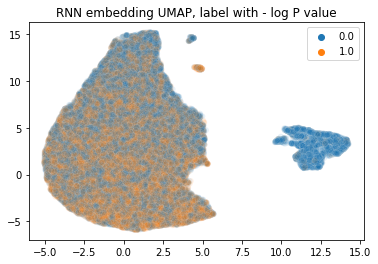

In [145]:
umap.UMAP_log_P(embedding, y_p_train)

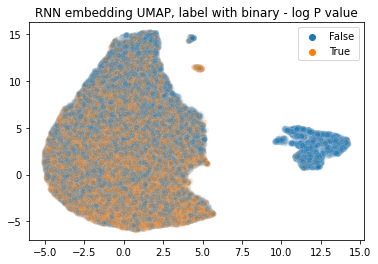

In [146]:
umap.UMAP_binary_log_P(embedding, y_p_train, 0.5)

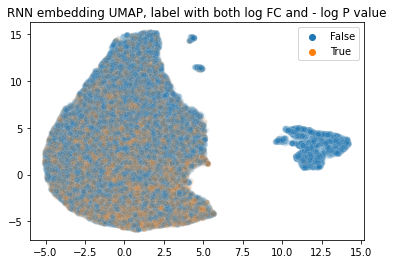

In [147]:
umap.UMAP_joint(embedding, y_f_train, 0.5, y_p_train, 0.5)

In [152]:
true_cluster = []
good_seqs = []
for i in range(len(embedding)):
    x1 = embedding[i][0]
    x2 = embedding[i][1]
    if y_f_train[i] > 0.5:
        if y_f_train[i] >0.5:
            if x1 <7.5 :
                true_cluster.append(X_train[i,:,1])
for feature in true_cluster:
    good_seqs.append(RAA_to_seq(feature))

In [153]:
ninemer_seq = []
for seq in good_seqs:
    if len(seq) == 9:
        ninemer_seq.append(seq[1:])

In [154]:
ninemer_seq

['FCVYQHCA',
 'CYGLLTCV',
 'ACVVQCAH',
 'SCSYGLTC',
 'CTRNQNCY',
 'SCYRDCVA',
 'PCLGNLYC',
 'CGHKQCAR',
 'GCRDYSSC',
 'CDYPRMCS',
 'LCFPPRCH',
 'VCMLPVCN',
 'CYDSFCFN',
 'YCDRWVCY',
 'KCGSTCKL',
 'CFMLDCLW',
 'SCSPDTCR',
 'SCKSLFCP',
 'CSLWVCPS',
 'ACQASCFV',
 'CGYNPWCK',
 'PCYSACAR',
 'DCSGYCMA',
 'CHWALRCL',
 'NCNSGPAC',
 'CEYTGFCL',
 'CLNQVFCV',
 'CTHSAAGC',
 'LCGAKGPC',
 'CMCLSCAC',
 'CLKPWSQC',
 'CLCFSCCY',
 'CHYWSRCA',
 'CDLSSPCR',
 'GCRGSNCH',
 'DCNFFPFC',
 'CRTAHFVC',
 'CGWWYAGC',
 'CQLGHSCL',
 'CCCTHGTC',
 'GCTTWGCR',
 'GCLFRCLS',
 'TCDDYCVS',
 'SCPLKFGC',
 'CTYSTCYV',
 'CSASGCRL',
 'CLHGGKCS',
 'YCLWPRCN',
 'CLHPVCGV',
 'CNLGVSCQ',
 'YCFTLDCC',
 'CQGMACVR',
 'CRSVVTVC',
 'TCLDWLCL',
 'CHTSGCSY',
 'CVFFVCDP',
 'CGQGYQCH',
 'CLSNNTCS',
 'CAFKCKEC',
 'GCLTLCVL',
 'TCARHWCR',
 'CWQGFCRL',
 'CDLANCRH',
 'CFWGRDAC',
 'CLSLYECF',
 'CSGFSCSH',
 'CYVLHCPY',
 'CWLFSCDY',
 'CRPFACNL',
 'PCFTSVWC',
 'TCHAGCYN',
 'LCSLGRGC',
 'PCSRFLSC',
 'CPLRNCLS',
 'HCLFNCGY',
 'ACGEWCRT',
 'GCGMRCYV',

In [155]:
import pandas as pd

In [156]:
seq9_s = pd.Series(ninemer_seq)
seq9_s=seq9_s.str.split(r'', expand=True)
seq9_s = seq9_s.drop(0,axis=1)
seq9_s = seq9_s.drop(9,axis=1)

In [157]:
seq9_s

1  2  3  4  5  6  7  8
0      F  C  V  Y  Q  H  C  A
1      C  Y  G  L  L  T  C  V
2      A  C  V  V  Q  C  A  H
3      S  C  S  Y  G  L  T  C
4      C  T  R  N  Q  N  C  Y
...   .. .. .. .. .. .. .. ..
90894  C  S  S  E  R  C  V  S
90895  S  C  S  S  F  S  T  C
90896  S  C  L  L  N  Y  C  S
90897  S  C  G  S  S  Y  C  R
90898  C  R  G  A  V  K  C  F

[90899 rows x 8 columns]

In [158]:
frames=[]
for i in range(8):
  frames.append(seq9_s.iloc[:,i].value_counts().sort_index())
seq9_result = pd.concat(frames,axis=1,join='outer')

In [159]:
seq9_result

1      2      3      4      5      6      7      8
A   2838   1572   4908   5584   5637   3862   3803   3914
C  47794  43384    439    222    313  29468  31991  30049
D   1764   2199   3909   3847   3771   2097   1842   1842
E   1398   1466   2591   2554   2634   1519   1248   1388
F   1562   2294   4047   4788   4523   3107   2799   2756
G   4167   4573  10127   8997   8352   5376   5127   4601
H   1371   1886   3350   3446   3375   2209   2044   2302
K   1310   1529   2904   3009   2998   2046   1981   2165
L   4160   4141   7552   7683   7521   5596   5562   5812
M   1724   1821   2710   2665   3092   2250   2213   2296
N   1991   2577   4197   4259   4273   2666   2574   2333
P   1977   1954   4165   4119   3917   2598   2297   2573
Q   1179   1340   2221   2149   2255   1618   1573   1781
R   1674   2115   5310   5963   6460   4901   5002   5620
S   5221   5831  11018  10743  10714   6917   6511   6352
T   2414   2986   5316   4589   4935   3371   3226   3230
V   4390   3644   6390   5703   6020   4125   4430   4916
W    770   1937   3469   3796   3793   2633   2318   2241
Y   3195   3650   6276   6783   6316   4540   4358   4728

<AxesSubplot: >

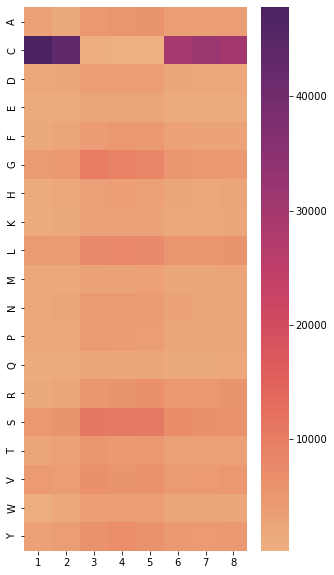

In [160]:
fig, ax = plt.subplots(figsize=(5, 10))
sns.heatmap(seq9_result, cmap=sns.color_palette("flare", as_cmap=True))

In [161]:
Dict_3mer_occ = {}
for tmer in initialize_Proc2Vec_embeddings().keys():
    tmer_good_seqs = [find_3mer(seq, tmer) for seq in good_seqs]
    tmer_occ = np.array(tmer_good_seqs).sum()
    Dict_3mer_occ[tmer] = tmer_occ

sorted_x = sorted(Dict_3mer_occ.items(), key=operator.itemgetter(1))
sorted_x[-15:]

[('AAA', array([-1.74060e-01, -9.57560e-02,  5.95150e-02,  3.96730e-02,
       -3.75934e-01, -1.15415e-01,  9.07250e-02,  1.73422e-01,
        2.92520e-01,  1.90375e-01,  9.40910e-02, -1.97482e-01,
       -1.35202e-01,  7.55210e-02,  1.10771e-01,  4.79090e-02,
       -3.91934e-01,  7.35480e-02,  1.03868e-01, -4.59240e-02,
       -9.53400e-03,  5.56590e-02, -3.08000e-04,  2.15941e-01,
        8.44760e-02,  6.15730e-02,  1.28139e-01,  1.84247e-01,
       -1.00091e-01, -1.26661e-01, -5.72800e-03, -3.82720e-02,
        1.80597e-01, -1.55310e-01,  5.62320e-02, -5.92500e-03,
       -8.53810e-02, -5.69210e-02, -4.55200e-02,  2.65116e-01,
        9.02210e-02, -2.09879e-01,  2.05381e-01,  2.36790e-02,
       -9.29390e-02,  7.27670e-02, -1.05107e-01,  1.11120e-02,
       -1.60518e-01,  4.26270e-02,  1.51230e-01, -1.62708e-01,
       -8.34790e-02, -1.46657e-01,  9.13320e-02,  1.09579e-01,
       -1.01678e-01,  9.11980e-02,  5.51200e-03,  4.73180e-02,
        7.81080e-02,  2.03824e-01, -1.00126e-0

[('ACR', 2686),
 ('ATC', 2709),
 ('ACN', 2898),
 ('AAC', 3171),
 ('ACT', 3378),
 ('AYC', 3544),
 ('ACV', 4099),
 ('ACY', 4119),
 ('ALC', 4629),
 ('AGC', 4668),
 ('AVC', 4726),
 ('ACL', 4735),
 ('ACG', 5184),
 ('ASC', 5831),
 ('ACS', 6531)]

In [162]:
print(sorted_x[-1])
print(sorted_x[-2])
print(sorted_x[-3])
print(sorted_x[-4])
print(sorted_x[-5])

('ACS', 6531)
('ASC', 5831)
('ACG', 5184)
('ACL', 4735)
('AVC', 4726)


## 12ca5 vs mCDH2

In [163]:
R3_lib = data_loading.read_data_and_preprocess(datafile="12ca5-MDM2-mCDH2-R2.csv")
protein_of_interest = "12ca5"
other_protein = "mCDH2"
X, y = data_loading.build_dataset(
    R3_lib,
    protein_of_interest=protein_of_interest,
    other_protein=other_protein,
    dataset_type=data_loading.DATASET_TYPE.JOINT_REGRESSION,
)

 - log P value cutoff is -0.5263617374999704, and log FC value cutoff is 1.4770236828281365


In [164]:
y_f_cutoff = 0.955421147441985
y_p_cutoff = -0.33058129229327954

In [165]:
y[:,1]= y[:,1]>y_f_cutoff
y[:,0] = y[:,0]>y_p_cutoff

result = experiment.BinaryClassificationExperiment().run_adhoc_experiment(
    X, y, rnn.Joint_BinaryClassificationRNN_gelu
)

Epoch 1/50
822/822 [==============================] - 11s 6ms/step - loss: 0.4251 - accuracy: 0.9944 - recall_5: 0.8282 - precision_5: 0.5710
Epoch 2/50
822/822 [==============================] - 5s 6ms/step - loss: 0.4121 - accuracy: 0.9965 - recall_5: 0.8386 - precision_5: 0.5784
Epoch 3/50
822/822 [==============================] - 5s 6ms/step - loss: 0.4081 - accuracy: 0.9965 - recall_5: 0.8381 - precision_5: 0.5825
Epoch 4/50
822/822 [==============================] - 5s 6ms/step - loss: 0.4068 - accuracy: 0.9961 - recall_5: 0.8264 - precision_5: 0.5847
Epoch 5/50
822/822 [==============================] - 5s 6ms/step - loss: 0.4062 - accuracy: 0.9957 - recall_5: 0.8286 - precision_5: 0.5854
Epoch 6/50
822/822 [==============================] - 5s 6ms/step - loss: 0.4053 - accuracy: 0.9955 - recall_5: 0.8156 - precision_5: 0.5872
Epoch 7/50
822/822 [==============================] - 5s 6ms/step - loss: 0.4050 - accuracy: 0.9954 - recall_5: 0.8213 - precision_5: 0.5864
Epoch 8/50
8

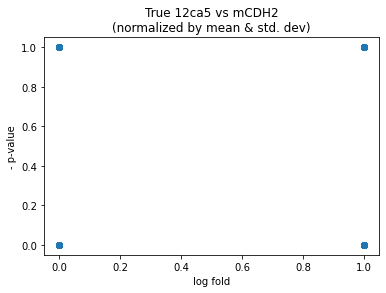

In [166]:
import matplotlib.pyplot as plt

def show_volcano(y, protein_of_interest, other_protein, title_addendum=""):
    plt.title(
        title_addendum
        + protein_of_interest
        + " vs "
        + other_protein
        + "\n(normalized by mean & std. dev)"
    )
    plt.ylabel("- p-value")
    plt.xlabel("log fold")
    plt.scatter(y[:, 1], y[:, 0], alpha=0.2)
    plt.show()

show_volcano(
    y, protein_of_interest, other_protein, title_addendum="True "
)

In [167]:
model =result.trained_model

In [168]:
X_train, X_test, y_f_train, y_f_test, y_p_train, y_p_test = scatter_plots.Kfold_sample(5, 0, X, y)

In [169]:
# evaluate accuracy, precision, recall of trianed model
evaluation.classifcation_evaluation(y_f_train, model(X_train)[:,1],y_f_cutoff)

99316 86 4323 1373
accuracy 0.9580486783763725
precision 0.9410555174777244
recall 0.24104634831460675


In [170]:
embedding=umap.embedding_classification(model,X_train)

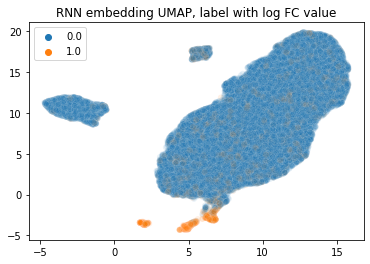

In [171]:
umap.UMAP_log_Fold(embedding, y_f_train)

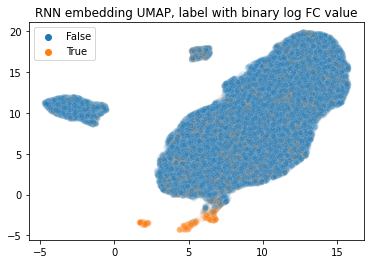

In [172]:
umap.UMAP_binary_log_Fold(embedding, y_f_train,0.5)

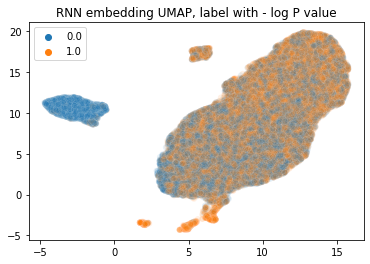

In [173]:
umap.UMAP_log_P(embedding, y_p_train)

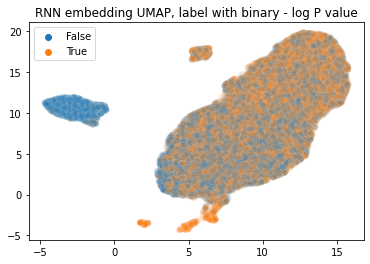

In [174]:
umap.UMAP_binary_log_P(embedding, y_p_train, 0.5)

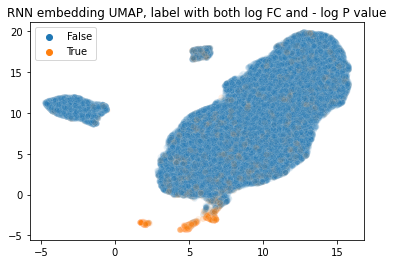

In [175]:
umap.UMAP_joint(embedding, y_f_train, 0.5, y_p_train, 0.5)

In [176]:
true_cluster = []
good_seqs = []
for i in range(len(embedding)):
    x1 = embedding[i][0]
    x2 = embedding[i][1]
    if y_f_train[i] > 0.5:
        if y_p_train[i]> 0.5:
            if x2 <0 :
                true_cluster.append(X_train[i,:,1])
for feature in true_cluster:
    good_seqs.append(RAA_to_seq(feature))

In [177]:
ninemer_seq = []
for seq in good_seqs:
    if len(seq) == 9:
        ninemer_seq.append(seq[1:])

In [178]:
ninemer_seq

['NCGDYAGC',
 'CGMTWCEE',
 'NCTMLECR',
 'CSGDYARC',
 'VCPRLECK',
 'FCYGDYSC',
 'TCFHLECK',
 'CYGDYACA',
 'FCLGDYAC',
 'CCFGDYAA',
 'YCLGDYAC',
 'CGDYRARC',
 'RCWGDYAC',
 'CGGAYCLE',
 'CEGDYAEC',
 'NCHLLECR',
 'SCNSYCME',
 'CGDYAASC',
 'VCPLVECK',
 'CQHTSCEE',
 'VCNVYCME',
 'VCSLLECK',
 'YCRGYYAC',
 'KCFHLECH',
 'CGDYADRC',
 'CVGDYACY',
 'FCGSYCDE',
 'QCGGYVER',
 'CRYVDGCA',
 'YCHMLECK',
 'FCGAYCME',
 'CLGVYACR',
 'HCGDYAAC',
 'CWMPWGEE',
 'CYVDYAAC',
 'RCYGDYSC',
 'CGDYAACH',
 'QCFGDYAC',
 'CAADSRDY',
 'CLGVYAAC',
 'CSGDYAGC',
 'VCSMVECR',
 'YCPDYSAC',
 'CGDYASYC',
 'CWDYACYV',
 'PCTLLECK',
 'CFMLECRS',
 'LCPMLECR',
 'RCYGDFAC',
 'CCMTWCEE',
 'CGDYAACR',
 'CRYVDGCM',
 'CVGDYACW',
 'NCRCDYAC',
 'CWGDYSAC',
 'GCNSYCYE',
 'KCGDYAAC',
 'CGDYAGCR',
 'VCFHLECF',
 'CRLYDGCV',
 'YCFGDYSC',
 'HCMLEGCN',
 'RCSGDYAC',
 'VCLDVMDC',
 'PCTLLECH',
 'CLGYYACR',
 'FCHGDYAC',
 'CDYADVAC',
 'CRLLDGCE',
 'PCFLLECR',
 'LCPMMECR',
 'VCLGDSAC',
 'TCRGDYAG',
 'RCLGDYAC',
 'FCLGDYAW',
 'CGFTLCEE',
 'RCFDYACW',

In [179]:
import pandas as pd

In [180]:
seq9_s = pd.Series(ninemer_seq)
seq9_s=seq9_s.str.split(r'', expand=True)
seq9_s = seq9_s.drop(0,axis=1)
seq9_s = seq9_s.drop(9,axis=1)

In [181]:
seq9_s

1  2  3  4  5  6  7  8
0     N  C  G  D  Y  A  G  C
1     C  G  M  T  W  C  E  E
2     N  C  T  M  L  E  C  R
3     C  S  G  D  Y  A  R  C
4     V  C  P  R  L  E  C  K
...  .. .. .. .. .. .. .. ..
1056  C  R  Y  F  D  G  C  D
1057  P  C  F  H  F  E  C  R
1058  C  R  Y  Y  D  G  C  D
1059  C  G  D  Y  S  A  K  C
1060  V  S  P  M  L  E  C  K

[1061 rows x 8 columns]

In [182]:
frames=[]
for i in range(8):
    frames.append(seq9_s.iloc[:,i].value_counts().sort_index())
seq9_result = pd.concat(frames,axis=1,join='outer')

In [183]:
seq9_result

1    2    3      4    5    6    7    8
A   22   18   37   46.0   73  272  297   18
C  490  549   11   15.0    1  177  343  455
D    8   25  110  280.0  306   13   37   23
E   14    3    3    2.0   26  166  100  172
F   35   29   98   13.0    7   14    5   10
G   62   92  230  231.0   13   72   20   26
H   31    2   48   23.0    4    1    5   10
K   26    4    5    1.0    2    2    5   54
L   39   40   90   84.0  141    2   39   10
M   16    9   37   61.0   16    4   20   12
N   20   40   43    5.0    2    4   16    4
P   34   19   42   13.0    2    2    5    7
Q   11    4    2    NaN    3    3    8   17
R   55   80   37    8.0   18   21   22  111
S   25   35   28   38.0   39   49   67   20
T   25   12   54   61.0    2    4    3   11
V   90   22   57   56.0   16   19   22   16
W   13   43   48    5.0   52    7   15   51
Y   45   35   81  119.0  338  229   32   34

<AxesSubplot: >

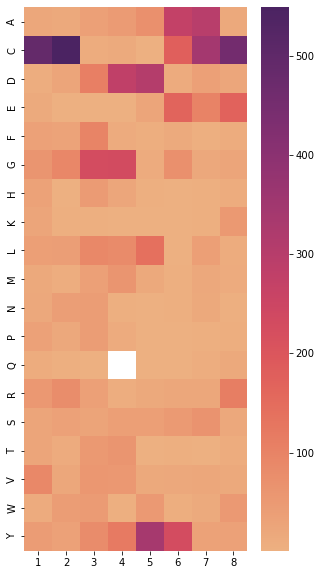

In [184]:
fig, ax = plt.subplots(figsize=(5, 10))
sns.heatmap(seq9_result, cmap=sns.color_palette("flare", as_cmap=True))

In [185]:
Dict_3mer_occ = {}
for tmer in initialize_Proc2Vec_embeddings().keys():
    tmer_good_seqs = [find_3mer(seq, tmer) for seq in good_seqs]
    tmer_occ = np.array(tmer_good_seqs).sum()
    Dict_3mer_occ[tmer] = tmer_occ

sorted_x = sorted(Dict_3mer_occ.items(), key=operator.itemgetter(1))
sorted_x[-15:]

[('AAA', array([-1.74060e-01, -9.57560e-02,  5.95150e-02,  3.96730e-02,
       -3.75934e-01, -1.15415e-01,  9.07250e-02,  1.73422e-01,
        2.92520e-01,  1.90375e-01,  9.40910e-02, -1.97482e-01,
       -1.35202e-01,  7.55210e-02,  1.10771e-01,  4.79090e-02,
       -3.91934e-01,  7.35480e-02,  1.03868e-01, -4.59240e-02,
       -9.53400e-03,  5.56590e-02, -3.08000e-04,  2.15941e-01,
        8.44760e-02,  6.15730e-02,  1.28139e-01,  1.84247e-01,
       -1.00091e-01, -1.26661e-01, -5.72800e-03, -3.82720e-02,
        1.80597e-01, -1.55310e-01,  5.62320e-02, -5.92500e-03,
       -8.53810e-02, -5.69210e-02, -4.55200e-02,  2.65116e-01,
        9.02210e-02, -2.09879e-01,  2.05381e-01,  2.36790e-02,
       -9.29390e-02,  7.27670e-02, -1.05107e-01,  1.11120e-02,
       -1.60518e-01,  4.26270e-02,  1.51230e-01, -1.62708e-01,
       -8.34790e-02, -1.46657e-01,  9.13320e-02,  1.09579e-01,
       -1.01678e-01,  9.11980e-02,  5.51200e-03,  4.73180e-02,
        7.81080e-02,  2.03824e-01, -1.00126e-0

[('PDY', 82),
 ('ECR', 82),
 ('ACR', 86),
 ('AVC', 87),
 ('RDY', 90),
 ('ACG', 91),
 ('LGD', 94),
 ('AAC', 96),
 ('YAA', 98),
 ('CGD', 104),
 ('LEC', 138),
 ('DYS', 152),
 ('YAC', 254),
 ('GDY', 444),
 ('DYA', 492)]

In [186]:
print(sorted_x[-1])
print(sorted_x[-2])
print(sorted_x[-3])
print(sorted_x[-4])
print(sorted_x[-5])

('DYA', 492)
('GDY', 444)
('YAC', 254)
('DYS', 152)
('LEC', 138)


## mCDH2 vs 12ca5

In [187]:
R3_lib = data_loading.read_data_and_preprocess(datafile="12ca5-MDM2-mCDH2-R2.csv")
protein_of_interest = "mCDH2"
other_protein = "12ca5"
X, y = data_loading.build_dataset(
    R3_lib,
    protein_of_interest=protein_of_interest,
    other_protein=other_protein,
    dataset_type=data_loading.DATASET_TYPE.JOINT_REGRESSION,
)

 - log P value cutoff is -0.5263617374999704, and log FC value cutoff is -1.4770236828281365


In [188]:
y_f_cutoff = -0.955421147441985
y_p_cutoff = -0.33058129229327954

In [189]:
y[:,1]= y[:,1]>y_f_cutoff
y[:,0] = y[:,0]>y_p_cutoff

result = experiment.BinaryClassificationExperiment().run_adhoc_experiment(
    X, y, rnn.Joint_BinaryClassificationRNN_gelu
)

Epoch 1/50
822/822 [==============================] - 9s 6ms/step - loss: 0.4263 - accuracy: 0.4739 - recall_6: 0.9632 - precision_6: 0.7757
Epoch 2/50
822/822 [==============================] - 6s 7ms/step - loss: 0.4126 - accuracy: 0.4791 - recall_6: 0.9598 - precision_6: 0.7861
Epoch 3/50
822/822 [==============================] - 7s 9ms/step - loss: 0.4105 - accuracy: 0.4801 - recall_6: 0.9586 - precision_6: 0.7879
Epoch 4/50
822/822 [==============================] - 7s 8ms/step - loss: 0.4091 - accuracy: 0.4806 - recall_6: 0.9569 - precision_6: 0.7893
Epoch 5/50
822/822 [==============================] - 5s 6ms/step - loss: 0.4076 - accuracy: 0.4814 - recall_6: 0.9568 - precision_6: 0.7899
Epoch 6/50
822/822 [==============================] - 5s 6ms/step - loss: 0.4065 - accuracy: 0.4820 - recall_6: 0.9547 - precision_6: 0.7915
Epoch 7/50
822/822 [==============================] - 5s 6ms/step - loss: 0.4054 - accuracy: 0.4826 - recall_6: 0.9540 - precision_6: 0.7918
Epoch 8/50
82

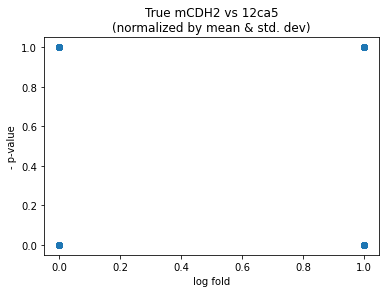

In [190]:
import matplotlib.pyplot as plt

def show_volcano(y, protein_of_interest, other_protein, title_addendum=""):
    plt.title(
        title_addendum
        + protein_of_interest
        + " vs "
        + other_protein
        + "\n(normalized by mean & std. dev)"
    )
    plt.ylabel("- p-value")
    plt.xlabel("log fold")
    plt.scatter(y[:, 1], y[:, 0], alpha=0.2)
    plt.show()

show_volcano(
    y, protein_of_interest, other_protein, title_addendum="True "
)

In [191]:
model =result.trained_model

In [192]:
X_train, X_test, y_f_train, y_f_test, y_p_train, y_p_test = scatter_plots.Kfold_sample(5, 0, X, y)

In [193]:
# evaluate accuracy, precision, recall of trianed model
evaluation.classifcation_evaluation(y_f_train, model(X_train)[:,1],y_f_cutoff)

0 0 1513 103585
accuracy 0.9856039125387733
precision 1.0
recall 0.9856039125387733


In [194]:
embedding=umap.embedding_classification(model,X_train)

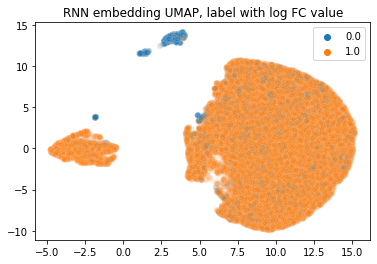

In [195]:
umap.UMAP_log_Fold(embedding, y_f_train)

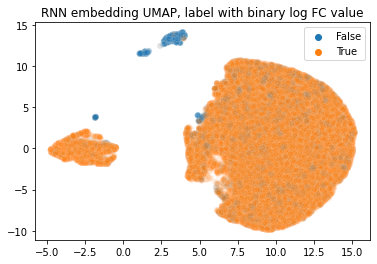

In [196]:
umap.UMAP_binary_log_Fold(embedding, y_f_train,0.5)

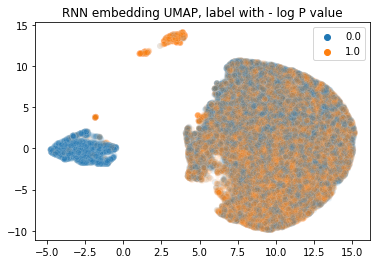

In [197]:
umap.UMAP_log_P(embedding, y_p_train)

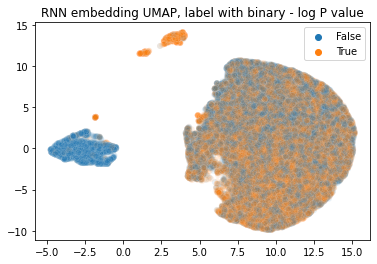

In [198]:
umap.UMAP_binary_log_P(embedding, y_p_train, 0.5)

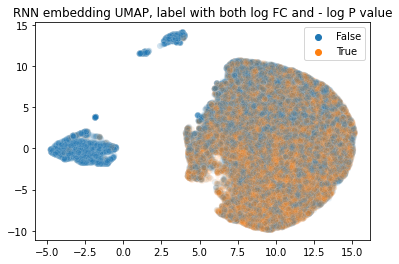

In [199]:
umap.UMAP_joint(embedding, y_f_train, 0.5, y_p_train, 0.5)

In [202]:
true_cluster = []
good_seqs = []
for i in range(len(embedding)):
    x1 = embedding[i][0]
    x2 = embedding[i][1]
    if y_f_train[i] > y_f_cutoff:
        if y_p_train[i]> y_p_cutoff:
            if x1 > 2.5 and x2<12:
                true_cluster.append(X_train[i,:,1])
for feature in true_cluster:
    good_seqs.append(RAA_to_seq(feature))

In [203]:
ninemer_seq = []
for seq in good_seqs:
    if len(seq) == 9:
        ninemer_seq.append(seq[1:])

In [204]:
ninemer_seq

['CGMPFTCD',
 'SCHESKVC',
 'CYDQHCTL',
 'TCTYYNGC',
 'CGNGLVYC',
 'CRAQSCAY',
 'SCNGHCLM',
 'CVANVLSC',
 'CEVASVYC',
 'CYASSVGC',
 'CYWSVCRT',
 'SCVRVNYC',
 'ECLSEPLC',
 'CFDTVWCL',
 'CFYSSCSR',
 'RCDTTFAC',
 'CYEHVGRC',
 'YCSAVFEC',
 'GCHWLHGC',
 'CVFKTAPC',
 'VCLNKMCT',
 'CVWSSGVC',
 'KCPAVGCG',
 'VCVSSEYC',
 'DCEVVRGC',
 'GCNARLCN',
 'VCGPRCTL',
 'HCSSECGR',
 'CPRLGHCF',
 'FCVVNCRN',
 'LCYGEQAC',
 'FCERTSCG',
 'VCYSGCHR',
 'CTGFHCVQ',
 'CQSKLHCY',
 'ACMSGCFY',
 'CRHWECYV',
 'NCMESYVC',
 'ACKWQGGC',
 'VCGSTWCH',
 'CEGLLFTC',
 'CMLSHSCG',
 'HCDHLGCP',
 'CYFKSCRA',
 'GCLSMLCS',
 'ECNYSCGY',
 'GCFVMRGC',
 'CWTSGLCS',
 'CSDEMRCH',
 'CYLNTYCF',
 'GCDWESLC',
 'CAVSGCVH',
 'ECTNFSCY',
 'CACDSVCR',
 'CDYYLCVN',
 'CNVMGCLY',
 'CHTPPSCV',
 'ECKLNYLC',
 'WCPEDCLT',
 'TCSKVVWC',
 'HCYNDYDC',
 'VCFASQCE',
 'CQVDLCPV',
 'CKGYACGR',
 'CVGHSYCV',
 'VCCCPVFC',
 'CHQWNTCY',
 'CADKYLCQ',
 'PCYLGMVC',
 'CVRQYCGH',
 'CWYDLPCL',
 'FCMYFPCR',
 'TCLQTLSC',
 'CGSYFCNG',
 'TCRFGCVL',
 'VCGWLCQS',
 'CGSYGSEC',

In [205]:
import pandas as pd

In [206]:
seq9_s = pd.Series(ninemer_seq)
seq9_s=seq9_s.str.split(r'', expand=True)
seq9_s = seq9_s.drop(0,axis=1)
seq9_s = seq9_s.drop(9,axis=1)

In [207]:
seq9_s

1  2  3  4  5  6  7  8
0      C  G  M  P  F  T  C  D
1      S  C  H  E  S  K  V  C
2      C  Y  D  Q  H  C  T  L
3      T  C  T  Y  Y  N  G  C
4      C  G  N  G  L  V  Y  C
...   .. .. .. .. .. .. .. ..
95153  V  C  A  G  Y  R  C  V
95154  C  Y  E  H  Y  G  G  C
95155  Y  C  D  N  R  Y  E  C
95156  R  C  Y  E  V  R  C  V
95157  L  C  N  P  W  T  F  C

[95158 rows x 8 columns]

In [208]:
frames=[]
for i in range(8):
    frames.append(seq9_s.iloc[:,i].value_counts().sort_index())
seq9_result = pd.concat(frames,axis=1,join='outer')

In [209]:
seq9_result

1      2      3      4      5      6      7      8
A   2922   1651   5156   5873   5914   4025   3937   4074
C  50215  45241    495    223    304  30756  33636  31398
D   1833   2329   4117   3974   3953   2247   1875   1911
E   1474   1550   2733   2641   2773   1636   1338   1501
F   1647   2420   4274   4989   4675   3220   2829   2863
G   4410   4853  10526   9456   8850   5618   5374   4794
H   1434   1963   3571   3645   3572   2342   2202   2432
K   1390   1559   3052   3148   3120   2135   2057   2256
L   4317   4447   7963   8087   7850   5861   5872   6079
M   1780   1883   2844   2809   3284   2350   2363   2416
N   2053   2697   4416   4489   4464   2736   2680   2452
P   2060   2053   4284   4278   4080   2699   2371   2701
Q   1219   1396   2321   2273   2409   1674   1647   1897
R   1711   2274   5420   6283   6740   5174   5162   5956
S   5529   6180  11574  11153  11211   7291   6851   6624
T   2527   3052   5580   4883   5085   3521   3355   3369
V   4571   3830   6665   5989   6287   4325   4662   5149
W    794   2000   3605   3987   3939   2794   2410   2311
Y   3272   3780   6562   6978   6648   4754   4537   4975

<AxesSubplot: >

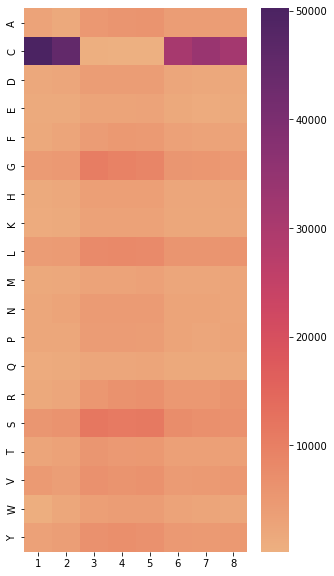

In [210]:
fig, ax = plt.subplots(figsize=(5, 10))
sns.heatmap(seq9_result, cmap=sns.color_palette("flare", as_cmap=True))

In [ ]:
Dict_3mer_occ = {}
for tmer in initialize_Proc2Vec_embeddings().keys():
    tmer_good_seqs = [find_3mer(seq, tmer) for seq in good_seqs]
    tmer_occ = np.array(tmer_good_seqs).sum()
    Dict_3mer_occ[tmer] = tmer_occ

sorted_x = sorted(Dict_3mer_occ.items(), key=operator.itemgetter(1))
sorted_x[-15:]

[('AAA', array([-1.74060e-01, -9.57560e-02,  5.95150e-02,  3.96730e-02,
       -3.75934e-01, -1.15415e-01,  9.07250e-02,  1.73422e-01,
        2.92520e-01,  1.90375e-01,  9.40910e-02, -1.97482e-01,
       -1.35202e-01,  7.55210e-02,  1.10771e-01,  4.79090e-02,
       -3.91934e-01,  7.35480e-02,  1.03868e-01, -4.59240e-02,
       -9.53400e-03,  5.56590e-02, -3.08000e-04,  2.15941e-01,
        8.44760e-02,  6.15730e-02,  1.28139e-01,  1.84247e-01,
       -1.00091e-01, -1.26661e-01, -5.72800e-03, -3.82720e-02,
        1.80597e-01, -1.55310e-01,  5.62320e-02, -5.92500e-03,
       -8.53810e-02, -5.69210e-02, -4.55200e-02,  2.65116e-01,
        9.02210e-02, -2.09879e-01,  2.05381e-01,  2.36790e-02,
       -9.29390e-02,  7.27670e-02, -1.05107e-01,  1.11120e-02,
       -1.60518e-01,  4.26270e-02,  1.51230e-01, -1.62708e-01,
       -8.34790e-02, -1.46657e-01,  9.13320e-02,  1.09579e-01,
       -1.01678e-01,  9.11980e-02,  5.51200e-03,  4.73180e-02,
        7.81080e-02,  2.03824e-01, -1.00126e-0

In [ ]:
print(sorted_x[-1])
print(sorted_x[-2])
print(sorted_x[-3])
print(sorted_x[-4])
print(sorted_x[-5])

## Load Data, Get Representation, Train Binary Classification RNN Model, CrossFold Best Model¶
(Binary classification on log fold change)

In [21]:
y_fc = y[:,1]> y_f_cutoff
y_p = y[:,0]

result1 = experiment.BinaryClassificationExperiment().run_cross_validation_experiment(
    X, y_fc, rnn.BinaryClassificationRNN
)

Epoch 1/16
206/206 [==============================] - 3s 5ms/step - loss: 0.1304 - accuracy: 0.8430 - recall_1: 0.1931 - precision_1: 0.7236
Epoch 2/16
206/206 [==============================] - 1s 5ms/step - loss: 0.1064 - accuracy: 0.8696 - recall_1: 0.3181 - precision_1: 0.8655
Epoch 3/16
206/206 [==============================] - 1s 5ms/step - loss: 0.1025 - accuracy: 0.8726 - recall_1: 0.3279 - precision_1: 0.8855
Epoch 4/16
206/206 [==============================] - 1s 6ms/step - loss: 0.0989 - accuracy: 0.8764 - recall_1: 0.3505 - precision_1: 0.8882
Epoch 5/16
206/206 [==============================] - 1s 5ms/step - loss: 0.0953 - accuracy: 0.8837 - recall_1: 0.4012 - precision_1: 0.8824
Epoch 6/16
206/206 [==============================] - 1s 5ms/step - loss: 0.0933 - accuracy: 0.8864 - recall_1: 0.4070 - precision_1: 0.9014
Epoch 7/16
206/206 [==============================] - 1s 5ms/step - loss: 0.0915 - accuracy: 0.8886 - recall_1: 0.4127 - precision_1: 0.9167
Epoch 8/16
20

In [23]:
model =result1[1].trained_model

In [24]:
X_train, X_test, y_f_train, y_f_test, y_p_train, y_p_test = scatter_plots.Kfold_sample(5, 1, X, y)    

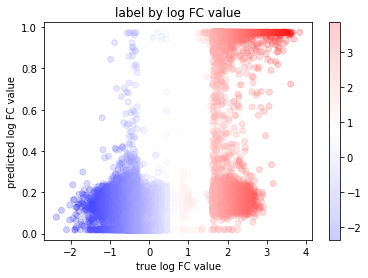

In [25]:
#Train samples classification results (TRAIN)
scatter_plots.Predicted_vs_actual_plot(y_f_train, model(X_train), y_f_train, "log FC" , "log FC", "log FC")

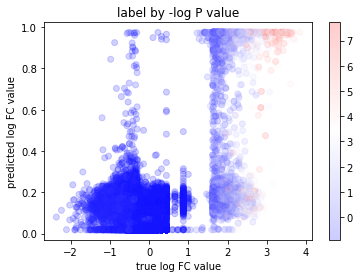

In [26]:
#Train samples classification results (TRAIN) 
scatter_plots.Predicted_vs_actual_plot(y_f_train, model(X_train), y_p_train, "log FC" , "log FC", "-log P")

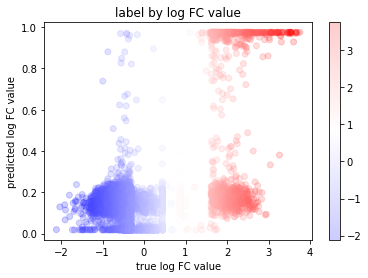

In [27]:
#Train samples classification results (TEST)
scatter_plots.Predicted_vs_actual_plot(y_f_test, model(X_test), y_f_test, "log FC" , "log FC", "log FC")

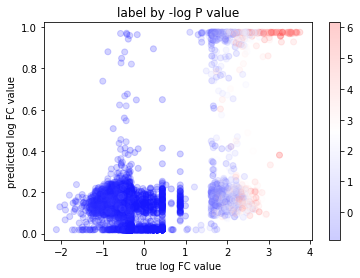

In [28]:
#Train samples classification results (TEST)
scatter_plots.Predicted_vs_actual_plot(y_f_test, model(X_test), y_p_test, "log FC" , "log FC", "-log P")

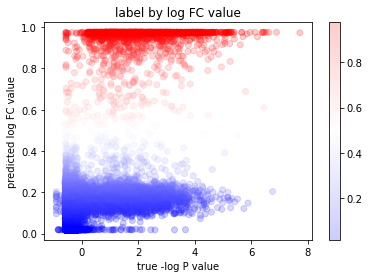

In [29]:
#Train samples classification results 
scatter_plots.Predicted_vs_actual_plot(y_p_train, model(X_train), model(X_train), "-log P" , "log FC", "log FC")

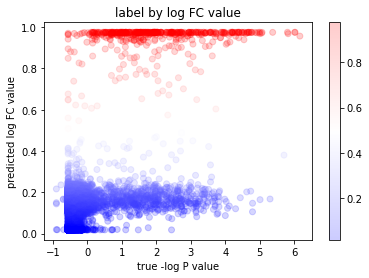

In [30]:
#Train samples classification results
scatter_plots.Predicted_vs_actual_plot(y_p_test, model(X_test), model(X_test), "-log P" , "log FC", "log FC")

In [31]:
# evaluate accuracy, precision, recall of trianed model
evaluation.classifcation_evaluation(y_f_train, model(X_train),y_f_cutoff)

21601 53 2726 1949
accuracy 0.8944509856052262
precision 0.9735264735264735
recall 0.4168983957219251


In [32]:
embedding=umap.embedding_classification(model,X_train)

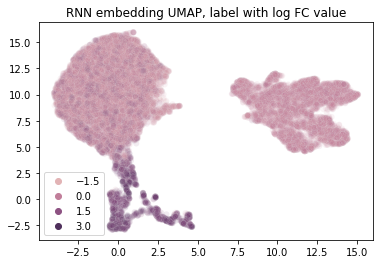

In [33]:
umap.UMAP_log_Fold(embedding, y_f_train)

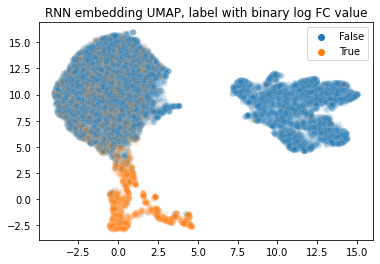

In [34]:
umap.UMAP_binary_log_Fold(embedding, y_f_train, y_f_cutoff)

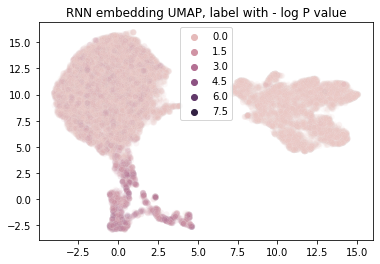

In [35]:
umap.UMAP_log_P(embedding, y_p_train)

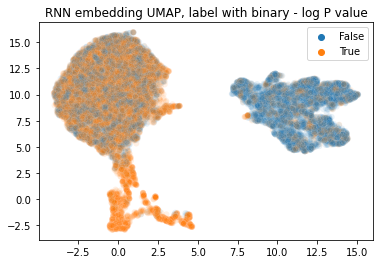

In [36]:
umap.UMAP_binary_log_P(embedding, y_p_train, y_p_cutoff)

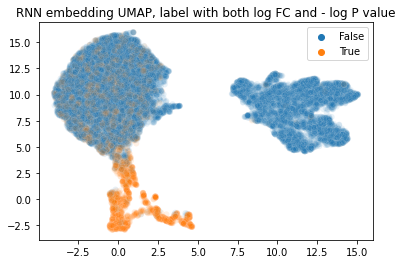

In [37]:
umap.UMAP_joint(embedding, y_f_train,y_f_cutoff, y_p_train, y_p_cutoff)

[(-4.0, 0.0)]

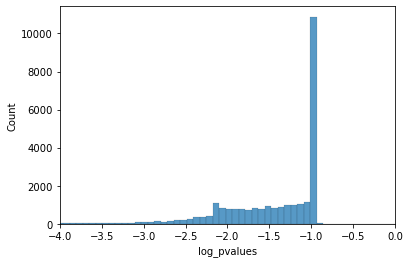

In [38]:
g=sns.histplot(R3_lib['log_pvalues'])
g.set(xlim=(-4,0))

<AxesSubplot: xlabel='log_pvalues', ylabel='Count'>

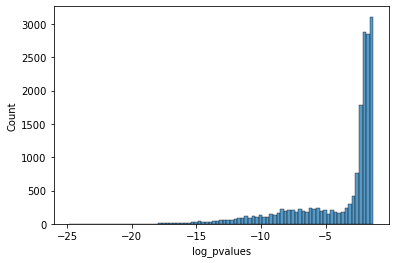

In [39]:
log_pvalues_cutoff = -R3_lib['log_pvalues'] > -np.log10(0.05)
sns.histplot(R3_lib.loc[log_pvalues_cutoff==True]['log_pvalues'])

In [40]:
true_cluster = []
good_seqs = []
for i in range(len(embedding)):
    x1 = embedding[i][0]
    x2 = embedding[i][1]
    if y_f_train[i] > y_f_cutoff:
        if y_p_train[i]>y_p_cutoff:
            if x2 >5.5:
                true_cluster.append(X_train[i,:,1])
for feature in true_cluster:
    good_seqs.append(RAA_to_seq(feature))

In [41]:
ninemer_seq = []
for seq in good_seqs:
    if len(seq) == 9:
        ninemer_seq.append(seq[1:])

In [42]:
Dict_3mer_occ = {}
for tmer in initialize_Proc2Vec_embeddings().keys():
    tmer_good_seqs = [find_3mer(seq, tmer) for seq in good_seqs]
    tmer_occ = np.array(tmer_good_seqs).sum()
    Dict_3mer_occ[tmer] = tmer_occ

sorted_x = sorted(Dict_3mer_occ.items(), key=operator.itemgetter(1))
sorted_x[-15:]

[('AAA', array([-1.74060e-01, -9.57560e-02,  5.95150e-02,  3.96730e-02,
       -3.75934e-01, -1.15415e-01,  9.07250e-02,  1.73422e-01,
        2.92520e-01,  1.90375e-01,  9.40910e-02, -1.97482e-01,
       -1.35202e-01,  7.55210e-02,  1.10771e-01,  4.79090e-02,
       -3.91934e-01,  7.35480e-02,  1.03868e-01, -4.59240e-02,
       -9.53400e-03,  5.56590e-02, -3.08000e-04,  2.15941e-01,
        8.44760e-02,  6.15730e-02,  1.28139e-01,  1.84247e-01,
       -1.00091e-01, -1.26661e-01, -5.72800e-03, -3.82720e-02,
        1.80597e-01, -1.55310e-01,  5.62320e-02, -5.92500e-03,
       -8.53810e-02, -5.69210e-02, -4.55200e-02,  2.65116e-01,
        9.02210e-02, -2.09879e-01,  2.05381e-01,  2.36790e-02,
       -9.29390e-02,  7.27670e-02, -1.05107e-01,  1.11120e-02,
       -1.60518e-01,  4.26270e-02,  1.51230e-01, -1.62708e-01,
       -8.34790e-02, -1.46657e-01,  9.13320e-02,  1.09579e-01,
       -1.01678e-01,  9.11980e-02,  5.51200e-03,  4.73180e-02,
        7.81080e-02,  2.03824e-01, -1.00126e-0

[('AYC', 68),
 ('ACF', 72),
 ('ACH', 74),
 ('ACT', 75),
 ('AAC', 78),
 ('ACR', 84),
 ('ALC', 92),
 ('ACY', 99),
 ('ACV', 115),
 ('ACL', 118),
 ('AGC', 122),
 ('ACG', 133),
 ('AVC', 142),
 ('ASC', 156),
 ('ACS', 164)]

In [43]:
print(sorted_x[-1])
print(sorted_x[-2])
print(sorted_x[-3])
print(sorted_x[-4])
print(sorted_x[-5])

('ACS', 164)
('ASC', 156)
('AVC', 142)
('ACG', 133)
('AGC', 122)


In [3]:
R3_lib = data_loading.read_data_and_preprocess(datafile="12ca5-MDM2-mCDH2-R3.csv")

protein_of_interest = "mCDH2"
other_protein = "12ca5"

# protein_of_interest = "12ca5"
# other_protein = "mCDH2"

X, y = data_loading.build_dataset(
    R3_lib,
    protein_of_interest=protein_of_interest,
    other_protein=other_protein,
    dataset_type=data_loading.DATASET_TYPE.JOINT_REGRESSION,
)

 - log P value cutoff is -0.33058129229327954, and log FC value cutoff is -0.955421147441985


In [4]:
y_f = y[:,1]
y_p = y[:,0]

# result2 = experiment.SingleRegressionExperiment().run_adhoc_experiment(
#     X, y_f, rnn.SingleRegression_CNNRNN, exp_name=None
# )

test = experiment.SingleRegressionExperiment().run_adhoc_experiment(
    X, y_f, rnn.SingleRegression_CNNRNN, exp_name=None
)

2023-01-11 21:40:29.352498: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


Epoch 1/20
242/242 [==============================] - 9s 37ms/step - loss: 0.8896 - fold_rmse: 0.8896 - accuracy: 0.0000e+00 - val_loss: 0.9998 - val_fold_rmse: 1.0013 - val_accuracy: 0.0000e+00 - lr: 0.0010
Epoch 2/20
242/242 [==============================] - 9s 36ms/step - loss: 0.7779 - fold_rmse: 0.7781 - accuracy: 0.0000e+00 - val_loss: 0.7917 - val_fold_rmse: 0.7935 - val_accuracy: 0.0000e+00 - lr: 0.0010
Epoch 3/20
242/242 [==============================] - 9s 36ms/step - loss: 0.7493 - fold_rmse: 0.7501 - accuracy: 0.0000e+00 - val_loss: 0.7244 - val_fold_rmse: 0.7261 - val_accuracy: 0.0000e+00 - lr: 0.0010
Epoch 4/20
242/242 [==============================] - 9s 36ms/step - loss: 0.7364 - fold_rmse: 0.7363 - accuracy: 0.0000e+00 - val_loss: 0.7241 - val_fold_rmse: 0.7256 - val_accuracy: 0.0000e+00 - lr: 0.0010
Epoch 5/20
242/242 [==============================] - 9s 36ms/step - loss: 0.7286 - fold_rmse: 0.7296 - accuracy: 0.0000e+00 - val_loss: 0.7184 - val_fold_rmse: 0.7198 

KeyboardInterrupt: 

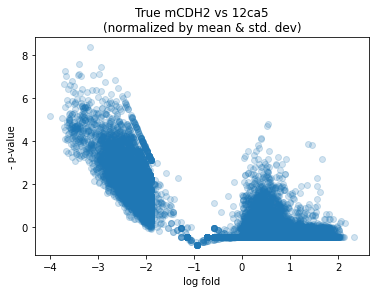

In [8]:
import matplotlib.pyplot as plt

def show_volcano(y, protein_of_interest, other_protein, title_addendum=""):
    plt.title(
        title_addendum
        + protein_of_interest
        + " vs "
        + other_protein
        + "\n(normalized by mean & std. dev)"
    )
    plt.ylabel("- p-value")
    plt.xlabel("log fold")
    plt.scatter(y[:, 1], y[:, 0], alpha=0.2)
    plt.show()

show_volcano(
    y, protein_of_interest, other_protein, title_addendum="True "
)

In [9]:
# import os
# import pickle
# exp_name = 'SingleRegressionRNN_2LSTM_Dense32_epoch10'
# exp_dir = os.path.join('experiments', exp_name)
# os.makedirs(exp_dir, exist_ok=True)
# with open(os.path.join(exp_dir, 'history.pkl'), 'wb') as f:
#     pickle.dump(history.history, f)

In [4]:
y_p_cutoff= -0.33058129229327954
y_f_cutoff= -0.9339957475557442

In [5]:
model =result2.trained_model

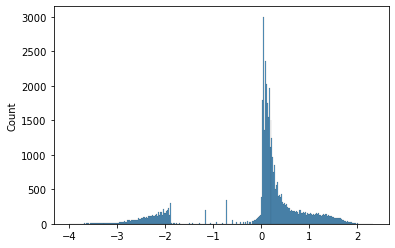

In [6]:
g=sns.histplot(y_f)

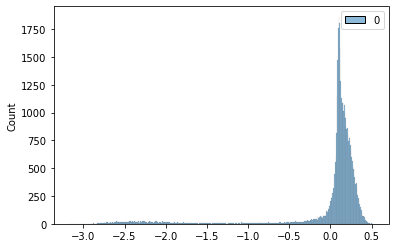

In [7]:
g=sns.histplot(model(X))

<AxesSubplot: ylabel='Count'>

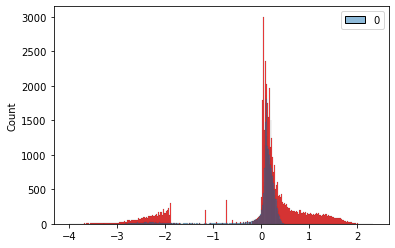

In [8]:
fig, ax = plt.subplots()
sns.histplot(y_f, ax=ax, color = 'r')
sns.histplot(model(X), ax=ax, color ='b')

In [9]:
X_train, X_test, y_f_train, y_f_test, y_p_train, y_p_test = scatter_plots.Kfold_sample(5, 0, X, y)

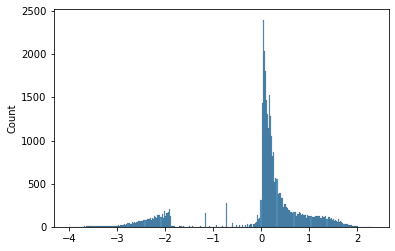

In [10]:
g=sns.histplot(y_f_train)

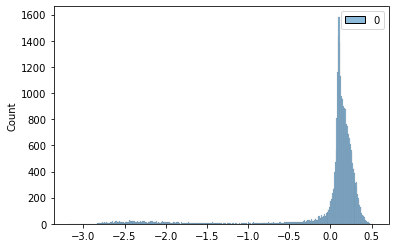

In [11]:
g=sns.histplot(model(X_train))

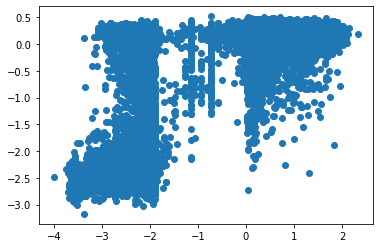

In [12]:
g=plt.scatter(y_f,model(X))

<AxesSubplot: ylabel='Count'>

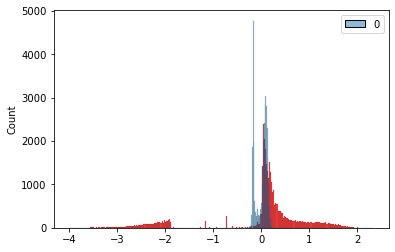

In [16]:
fig, ax = plt.subplots()
sns.histplot(y_f_train, ax=ax, color = 'r')
sns.histplot(model(X_train), ax=ax, color ='b')

NameError: name 'idx' is not defined

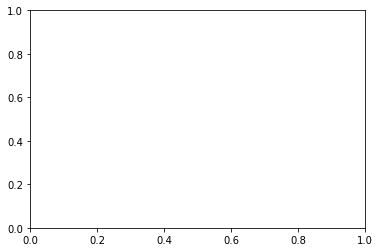

In [17]:
fig, ax = plt.subplots()
g=sns.histplot(y_f[idx], ax=ax, color = 'r')
sns.histplot(model(X[idx]), ax=ax, color ='b')

<AxesSubplot: ylabel='Count'>

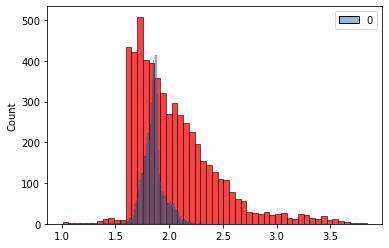

In [ ]:
fig, ax = plt.subplots()
g=sns.histplot(y_f[idx], ax=ax, color = 'r')
sns.histplot(model(X[idx]), ax=ax, color ='b')

<AxesSubplot: ylabel='Count'>

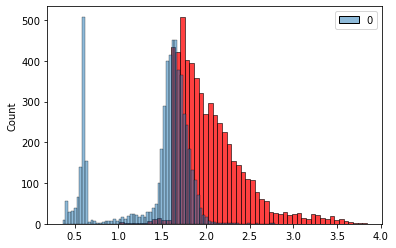

In [ ]:
fig, ax = plt.subplots()
g=sns.histplot(y_f[idx], ax=ax, color = 'r')
sns.histplot(model(X[idx]), ax=ax, color ='b')

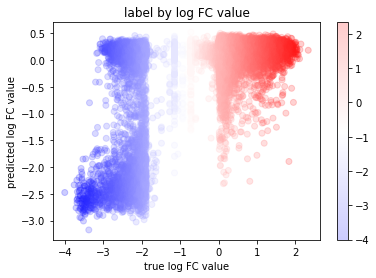

In [13]:
#Train samples classification results (TRAIN)
scatter_plots.Predicted_vs_actual_plot(y_f_train, model(X_train), y_f_train, "log FC" , "log FC", "log FC")

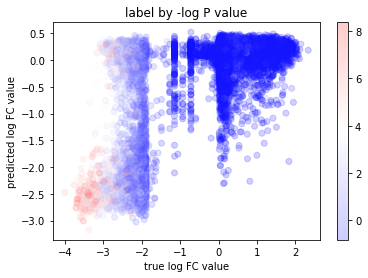

In [14]:
#Train samples classification results (TRAIN) 
scatter_plots.Predicted_vs_actual_plot(y_f_train, model(X_train), y_p_train, "log FC" , "log FC", "-log P")

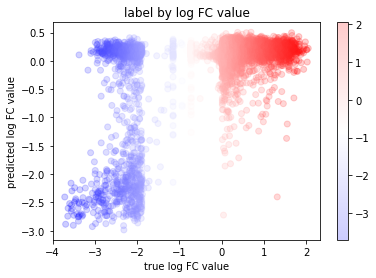

In [15]:
#Train samples classification results (TEST)
scatter_plots.Predicted_vs_actual_plot(y_f_test, model(X_test), y_f_test, "log FC" , "log FC", "log FC")

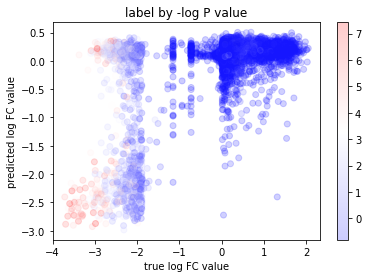

In [16]:
#Train samples classification results (TEST)
scatter_plots.Predicted_vs_actual_plot(y_f_test, model(X_test), y_p_test, "log FC" , "log FC", "-log P")

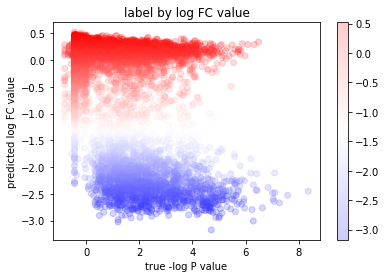

In [17]:
#Train samples classification results 
scatter_plots.Predicted_vs_actual_plot(y_p_train, model(X_train), model(X_train), "-log P" , "log FC", "log FC")

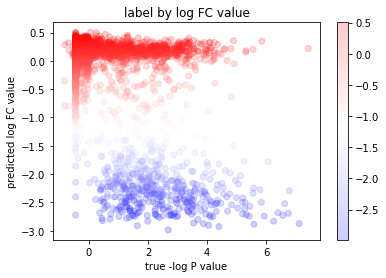

In [18]:
#Train samples classification results
scatter_plots.Predicted_vs_actual_plot(y_p_test, model(X_test), model(X_test), "-log P" , "log FC", "log FC")

In [19]:
# evaluate accuracy, precision, recall of trianed model
evaluation.single_regression_evaluation(y_f_train, model(X_train),y_f_cutoff)

4651 0 29680 2
accuracy 0.13552558762706435
precision 1.0
recall 6.738090425173506e-05


Text(0.5, 0, 'log_Fold')

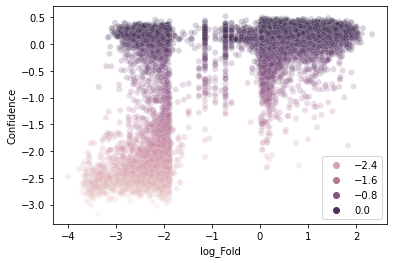

In [20]:
# confidence analysis
ax = sns.scatterplot(x=y_f_train, y=model(X_train).numpy().reshape(-1), hue=model(X_train).numpy().reshape(-1), alpha=0.2)
ax.set_ylabel('Confidence')
ax.set_xlabel('log_Fold')

In [21]:
embedding=umap.embedding_regression(model,X_train)

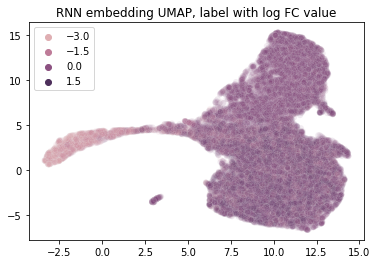

In [22]:
umap.UMAP_log_Fold(embedding, y_f_train)

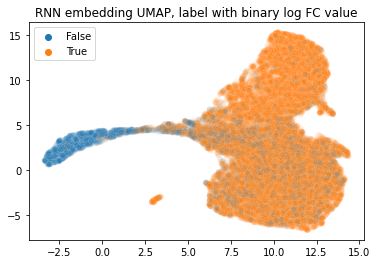

In [23]:
umap.UMAP_binary_log_Fold(embedding, y_f_train, y_f_cutoff)

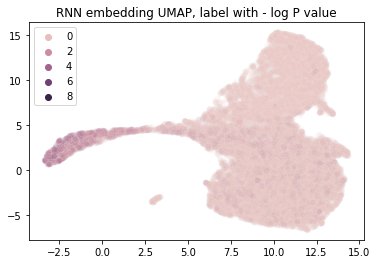

In [24]:
umap.UMAP_log_P(embedding, y_p_train)

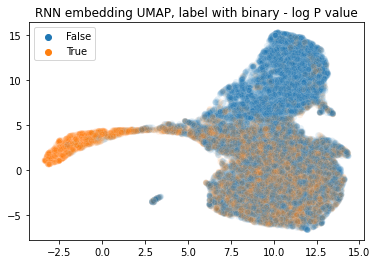

In [25]:
umap.UMAP_binary_log_P(embedding, y_p_train, y_p_cutoff)

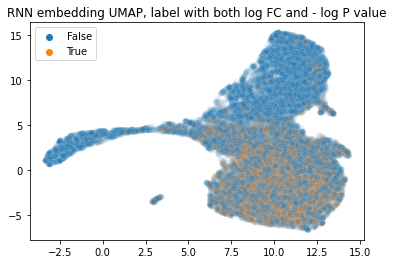

In [26]:
umap.UMAP_joint(embedding, y_f_train, y_f_cutoff, y_p_train, y_p_cutoff)

In [51]:
true_cluster = []
good_seqs = []
for i in range(len(embedding)):
    x1 = embedding[i][0]
    x2 = embedding[i][1]
    if y_f_train[i] > y_f_cutoff:
        if y_p_train[i]> y_p_cutoff:
            if x1 >6:
                true_cluster.append(X_train[i,:,1])
for feature in true_cluster:
    good_seqs.append(RAA_to_seq(feature))

In [52]:
ninemer_seq = []
for seq in good_seqs:
    if len(seq) == 9:
        ninemer_seq.append(seq[1:])

In [53]:
Dict_3mer_occ = {}
for tmer in initialize_Proc2Vec_embeddings().keys():
    tmer_good_seqs = [find_3mer(seq, tmer) for seq in good_seqs]
    tmer_occ = np.array(tmer_good_seqs).sum()
    Dict_3mer_occ[tmer] = tmer_occ

sorted_x = sorted(Dict_3mer_occ.items(), key=operator.itemgetter(1))
sorted_x[-15:]

[('AAA', array([-1.74060e-01, -9.57560e-02,  5.95150e-02,  3.96730e-02,
       -3.75934e-01, -1.15415e-01,  9.07250e-02,  1.73422e-01,
        2.92520e-01,  1.90375e-01,  9.40910e-02, -1.97482e-01,
       -1.35202e-01,  7.55210e-02,  1.10771e-01,  4.79090e-02,
       -3.91934e-01,  7.35480e-02,  1.03868e-01, -4.59240e-02,
       -9.53400e-03,  5.56590e-02, -3.08000e-04,  2.15941e-01,
        8.44760e-02,  6.15730e-02,  1.28139e-01,  1.84247e-01,
       -1.00091e-01, -1.26661e-01, -5.72800e-03, -3.82720e-02,
        1.80597e-01, -1.55310e-01,  5.62320e-02, -5.92500e-03,
       -8.53810e-02, -5.69210e-02, -4.55200e-02,  2.65116e-01,
        9.02210e-02, -2.09879e-01,  2.05381e-01,  2.36790e-02,
       -9.29390e-02,  7.27670e-02, -1.05107e-01,  1.11120e-02,
       -1.60518e-01,  4.26270e-02,  1.51230e-01, -1.62708e-01,
       -8.34790e-02, -1.46657e-01,  9.13320e-02,  1.09579e-01,
       -1.01678e-01,  9.11980e-02,  5.51200e-03,  4.73180e-02,
        7.81080e-02,  2.03824e-01, -1.00126e-0

[('CLG', 90),
 ('AYC', 91),
 ('ACR', 100),
 ('ECR', 100),
 ('DLR', 103),
 ('CGD', 106),
 ('AAC', 113),
 ('LGD', 115),
 ('YAA', 116),
 ('RDY', 125),
 ('LEC', 135),
 ('DYS', 169),
 ('YAC', 332),
 ('GDY', 579),
 ('DYA', 615)]

In [54]:
print(sorted_x[-1])
print(sorted_x[-2])
print(sorted_x[-3])
print(sorted_x[-4])
print(sorted_x[-5])

('DYA', 615)
('GDY', 579)
('YAC', 332)
('DYS', 169)
('LEC', 135)


In [ ]:
R3_lib = data_loading.read_data_and_preprocess(datafile="12ca5-MDM2-mCDH2-R3.csv")
protein_of_interest = "12ca5"
other_protein = "MDM2"
# other_protein = "mCDH2"
X, y = data_loading.build_dataset(
    R3_lib,
    protein_of_interest=protein_of_interest,
    other_protein=other_protein,
    dataset_type=data_loading.DATASET_TYPE.JOINT_REGRESSION,
)

 - log P value cutoff is -0.4463856871323837, and log FC value cutoff is 0.6565247891915524


Epoch 1/20
186/186 [==============================] - 7s 37ms/step - loss: 0.8466 - fold_rmse: 0.8506 - accuracy: 0.0000e+00 - val_loss: 1.0072 - val_fold_rmse: 1.0034 - val_accuracy: 0.0000e+00 - lr: 2.2313e-04
Epoch 2/20
186/186 [==============================] - 7s 40ms/step - loss: 0.7423 - fold_rmse: 0.7422 - accuracy: 0.0000e+00 - val_loss: 0.9118 - val_fold_rmse: 0.9072 - val_accuracy: 0.0000e+00 - lr: 2.2313e-04
Epoch 3/20
186/186 [==============================] - 7s 39ms/step - loss: 0.7253 - fold_rmse: 0.7272 - accuracy: 0.0000e+00 - val_loss: 0.7611 - val_fold_rmse: 0.7553 - val_accuracy: 0.0000e+00 - lr: 2.2313e-04
Epoch 4/20
186/186 [==============================] - 7s 36ms/step - loss: 0.7191 - fold_rmse: 0.7192 - accuracy: 0.0000e+00 - val_loss: 0.6938 - val_fold_rmse: 0.6870 - val_accuracy: 0.0000e+00 - lr: 2.2313e-04
Epoch 5/20
186/186 [==============================] - 7s 37ms/step - loss: 0.7105 - fold_rmse: 0.7085 - accuracy: 0.0000e+00 - val_loss: 0.6850 - val_fo

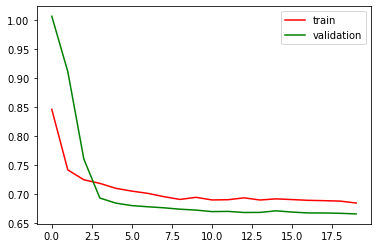

In [ ]:
y_f = y[:,1]
y_p = y[:,0]

result2 = experiment.SingleRegressionExperiment().run_adhoc_experiment(
    X, y, rnn.SingleRegression_CNNRNN, exp_name='SingleRegression_CNNRNN_Dense16_epoch20_12ca5_vs_mdm2'
)

In [ ]:
# import os
# import pickle
# exp_name = 'SingleRegressionRNN_2LSTM_Dense32_epoch10'
# exp_dir = os.path.join('experiments', exp_name)
# os.makedirs(exp_dir, exist_ok=True)
# with open(os.path.join(exp_dir, 'history.pkl'), 'wb') as f:
#     pickle.dump(history.history, f)

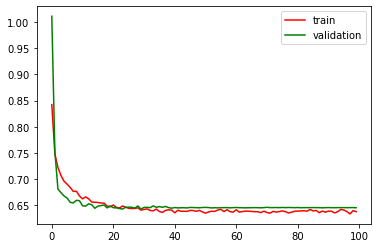

In [ ]:
fig, ax = plt.subplots()
ax.plot(history.history['loss'], color='r')
ax.plot(history.history['val_loss'], color='g')
ax.legend(['train', 'validation'])
fig.savefig(os.path.join(exp_dir, 'loss.png'))

In [ ]:
model =result2.trained_model

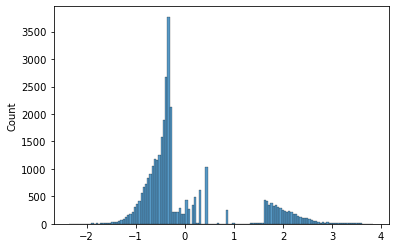

In [ ]:
g=sns.histplot(y_f)

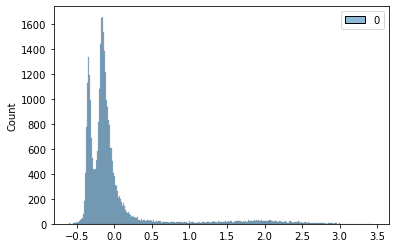

In [ ]:
g=sns.histplot(model(X))

<AxesSubplot: ylabel='Count'>

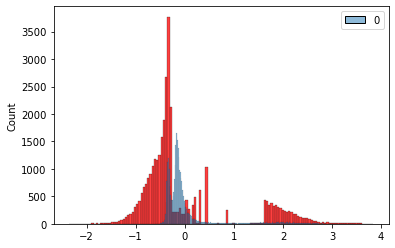

In [ ]:
fig, ax = plt.subplots()
sns.histplot(y_f, ax=ax, color = 'r')
sns.histplot(model(X), ax=ax, color ='b')

In [ ]:
X_train, X_test, y_f_train, y_f_test, y_p_train, y_p_test = scatter_plots.Kfold_sample(5, 0, X, y)

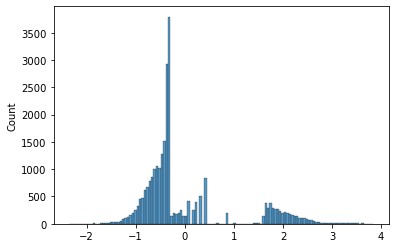

In [ ]:
g=sns.histplot(y_f_train)

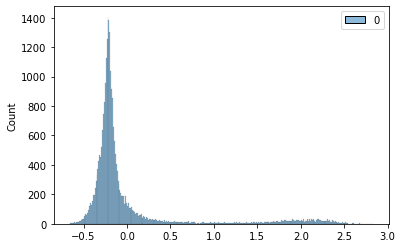

In [ ]:
g=sns.histplot(model(X_train))

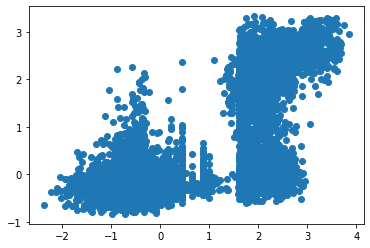

In [ ]:
g=plt.scatter(y_f,model(X))

<AxesSubplot: ylabel='Count'>

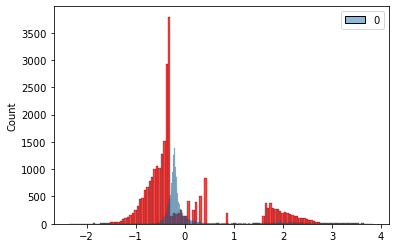

In [ ]:
fig, ax = plt.subplots()
sns.histplot(y_f_train, ax=ax, color = 'r')
sns.histplot(model(X_train), ax=ax, color ='b')

NameError: name 'idx' is not defined

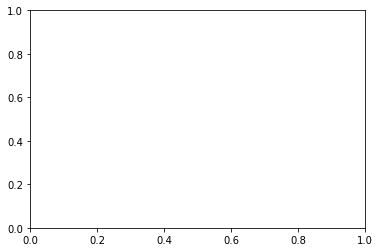

In [ ]:
fig, ax = plt.subplots()
g=sns.histplot(y_f[idx], ax=ax, color = 'r')
sns.histplot(model(X[idx]), ax=ax, color ='b')

<AxesSubplot: ylabel='Count'>

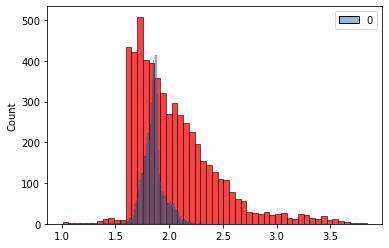

In [ ]:
fig, ax = plt.subplots()
g=sns.histplot(y_f[idx], ax=ax, color = 'r')
sns.histplot(model(X[idx]), ax=ax, color ='b')

<AxesSubplot: ylabel='Count'>

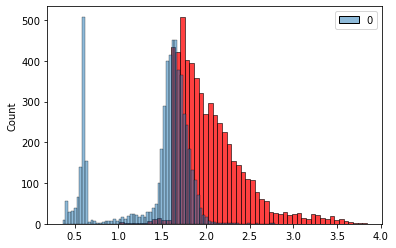

In [ ]:
fig, ax = plt.subplots()
g=sns.histplot(y_f[idx], ax=ax, color = 'r')
sns.histplot(model(X[idx]), ax=ax, color ='b')

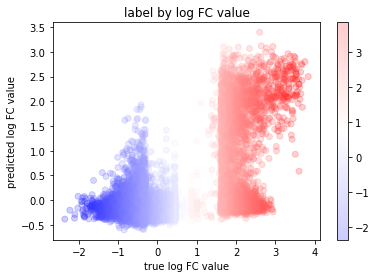

In [ ]:
#Train samples classification results (TRAIN)
scatter_plots.Predicted_vs_actual_plot(y_f_train, model(X_train), y_f_train, "log FC" , "log FC", "log FC")

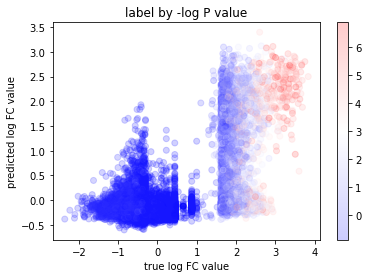

In [ ]:
#Train samples classification results (TRAIN) 
scatter_plots.Predicted_vs_actual_plot(y_f_train, model(X_train), y_p_train, "log FC" , "log FC", "-log P")

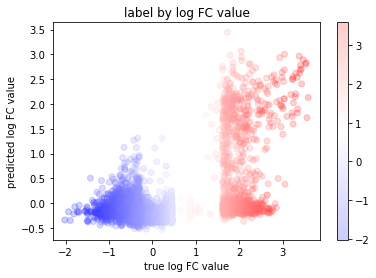

In [ ]:
#Train samples classification results (TEST)
scatter_plots.Predicted_vs_actual_plot(y_f_test, model(X_test), y_f_test, "log FC" , "log FC", "log FC")

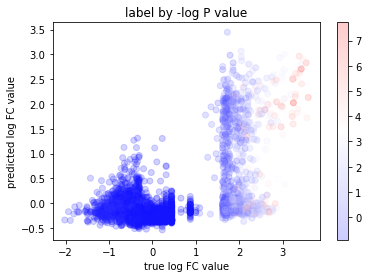

In [ ]:
#Train samples classification results (TEST)
scatter_plots.Predicted_vs_actual_plot(y_f_test, model(X_test), y_p_test, "log FC" , "log FC", "-log P")

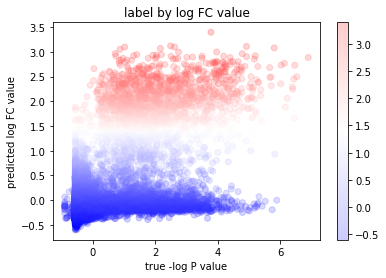

In [ ]:
#Train samples classification results 
scatter_plots.Predicted_vs_actual_plot(y_p_train, model(X_train), model(X_train), "-log P" , "log FC", "log FC")

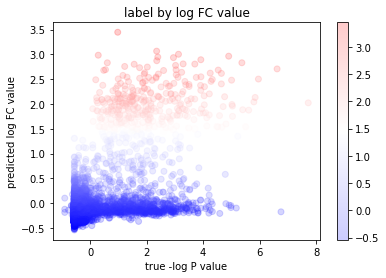

In [ ]:
#Train samples classification results
scatter_plots.Predicted_vs_actual_plot(y_p_test, model(X_test), model(X_test), "-log P" , "log FC", "log FC")

In [ ]:
# evaluate accuracy, precision, recall of trianed model
evaluation.single_regression_evaluation(y_f_train, model(X_train),y_f_cutoff)

21407 228 2694 1999
accuracy 0.8890154968094804
precision 0.8976201167489897
recall 0.42595354783720435


Text(0.5, 0, 'log_Fold')

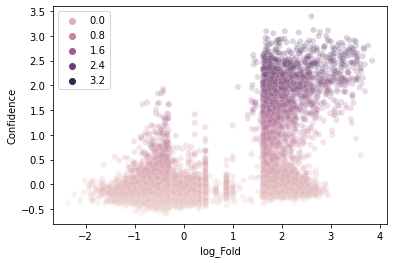

In [ ]:
# confidence analysis
ax = sns.scatterplot(x=y_f_train, y=model(X_train).numpy().reshape(-1), hue=model(X_train).numpy().reshape(-1), alpha=0.2)
ax.set_ylabel('Confidence')
ax.set_xlabel('log_Fold')

In [ ]:
embedding=umap.embedding_regression(model,X_train)

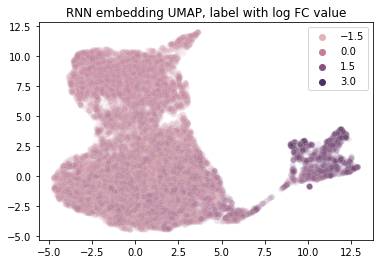

In [ ]:
umap.UMAP_log_Fold(embedding, y_f_train)

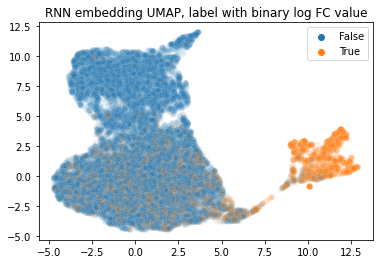

In [ ]:
umap.UMAP_binary_log_Fold(embedding, y_f_train, y_f_cutoff)

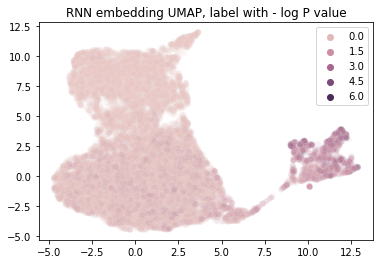

In [ ]:
umap.UMAP_log_P(embedding, y_p_train)

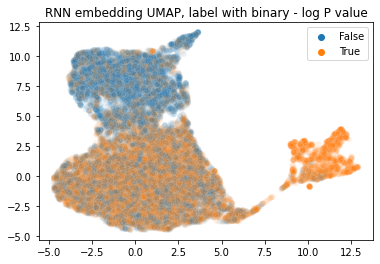

In [ ]:
umap.UMAP_binary_log_P(embedding, y_p_train, y_p_cutoff)

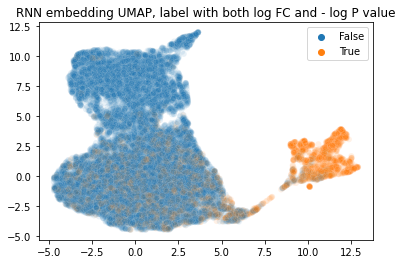

In [ ]:
umap.UMAP_joint(embedding, y_f_train, y_f_cutoff, y_p_train, y_p_cutoff)

In [ ]:
true_cluster = []
good_seqs = []
for i in range(len(embedding)):
    x1 = embedding[i][0]
    x2 = embedding[i][1]
    if y_f_train[i] > y_f_cutoff:
        if y_p_train[i]> y_p_cutoff:
            if x1 >6:
                true_cluster.append(X_train[i,:,1])
for feature in true_cluster:
    good_seqs.append(RAA_to_seq(feature))

In [ ]:
ninemer_seq = []
for seq in good_seqs:
    if len(seq) == 9:
        ninemer_seq.append(seq[1:])

In [ ]:
Dict_3mer_occ = {}
for tmer in initialize_Proc2Vec_embeddings().keys():
    tmer_good_seqs = [find_3mer(seq, tmer) for seq in good_seqs]
    tmer_occ = np.array(tmer_good_seqs).sum()
    Dict_3mer_occ[tmer] = tmer_occ

sorted_x = sorted(Dict_3mer_occ.items(), key=operator.itemgetter(1))
sorted_x[-15:]

[('AAA', array([-1.74060e-01, -9.57560e-02,  5.95150e-02,  3.96730e-02,
       -3.75934e-01, -1.15415e-01,  9.07250e-02,  1.73422e-01,
        2.92520e-01,  1.90375e-01,  9.40910e-02, -1.97482e-01,
       -1.35202e-01,  7.55210e-02,  1.10771e-01,  4.79090e-02,
       -3.91934e-01,  7.35480e-02,  1.03868e-01, -4.59240e-02,
       -9.53400e-03,  5.56590e-02, -3.08000e-04,  2.15941e-01,
        8.44760e-02,  6.15730e-02,  1.28139e-01,  1.84247e-01,
       -1.00091e-01, -1.26661e-01, -5.72800e-03, -3.82720e-02,
        1.80597e-01, -1.55310e-01,  5.62320e-02, -5.92500e-03,
       -8.53810e-02, -5.69210e-02, -4.55200e-02,  2.65116e-01,
        9.02210e-02, -2.09879e-01,  2.05381e-01,  2.36790e-02,
       -9.29390e-02,  7.27670e-02, -1.05107e-01,  1.11120e-02,
       -1.60518e-01,  4.26270e-02,  1.51230e-01, -1.62708e-01,
       -8.34790e-02, -1.46657e-01,  9.13320e-02,  1.09579e-01,
       -1.01678e-01,  9.11980e-02,  5.51200e-03,  4.73180e-02,
        7.81080e-02,  2.03824e-01, -1.00126e-0

[('PDY', 96),
 ('ACR', 106),
 ('ECR', 106),
 ('AVC', 107),
 ('DLR', 108),
 ('CGD', 115),
 ('RDY', 132),
 ('LGD', 133),
 ('YAA', 137),
 ('AAC', 141),
 ('DYS', 170),
 ('LEC', 171),
 ('YAC', 326),
 ('GDY', 582),
 ('DYA', 624)]

In [ ]:
print(sorted_x[-1])
print(sorted_x[-2])
print(sorted_x[-3])
print(sorted_x[-4])
print(sorted_x[-5])

('DYA', 624)
('GDY', 582)
('YAC', 326)
('LEC', 171)
('DYS', 170)


In [57]:
R3_lib = data_loading.read_data_and_preprocess(datafile="12ca5-MDM2-mCDH2-R3.csv")
protein_of_interest = "MDM2"
other_protein = "mCDH2"
# other_protein = "mCDH2"
X, y = data_loading.build_dataset(
    R3_lib,
    protein_of_interest=protein_of_interest,
    other_protein=other_protein,
    dataset_type=data_loading.DATASET_TYPE.JOINT_REGRESSION,
)

 - log P value cutoff is -0.08396512191297816, and log FC value cutoff is 0.2554564033078139


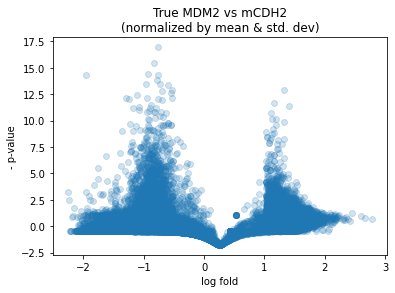

In [58]:
import matplotlib.pyplot as plt

def show_volcano(y, protein_of_interest, other_protein, title_addendum=""):
    plt.title(
        title_addendum
        + protein_of_interest
        + " vs "
        + other_protein
        + "\n(normalized by mean & std. dev)"
    )
    plt.ylabel("- p-value")
    plt.xlabel("log fold")
    plt.scatter(y[:, 1], y[:, 0], alpha=0.2)
    plt.show()

show_volcano(
    y, protein_of_interest, other_protein, title_addendum="True "
)

2023-01-11 07:27:58.195558: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


Epoch 1/20
332/332 [==============================] - 14s 41ms/step - loss: 0.9888 - fold_rmse: 0.9886 - accuracy: 0.0000e+00 - val_loss: 0.9117 - val_fold_rmse: 0.9123 - val_accuracy: 0.0000e+00 - lr: 0.0010
Epoch 2/20
332/332 [==============================] - 12s 37ms/step - loss: 0.9821 - fold_rmse: 0.9821 - accuracy: 0.0000e+00 - val_loss: 0.8985 - val_fold_rmse: 0.8990 - val_accuracy: 0.0000e+00 - lr: 0.0010
Epoch 3/20
332/332 [==============================] - 12s 36ms/step - loss: 0.9798 - fold_rmse: 0.9798 - accuracy: 0.0000e+00 - val_loss: 0.8999 - val_fold_rmse: 0.9005 - val_accuracy: 0.0000e+00 - lr: 0.0010
Epoch 4/20
332/332 [==============================] - 12s 35ms/step - loss: 0.9777 - fold_rmse: 0.9778 - accuracy: 0.0000e+00 - val_loss: 0.8968 - val_fold_rmse: 0.8973 - val_accuracy: 0.0000e+00 - lr: 0.0010
Epoch 5/20
332/332 [==============================] - 13s 38ms/step - loss: 0.9772 - fold_rmse: 0.9771 - accuracy: 0.0000e+00 - val_loss: 0.8966 - val_fold_rmse: 0.

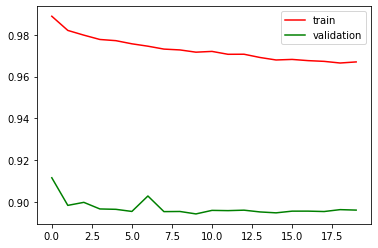

In [4]:
y_f = y[:,1]
y_p = y[:,0]

result2 = experiment.SingleRegressionExperiment().run_adhoc_experiment(
    X, y, rnn.SingleRegression_CNNRNN, exp_name='SingleRegression_CNNRNN_Dense16_epoch20_mdm2_vs_mCDH2'
)

In [22]:
y_p_cutoff=-0.08396512191297816
y_f_cutoff=0.2554564033078139

In [ ]:
# import os
# import pickle
# exp_name = 'SingleRegressionRNN_2LSTM_Dense32_epoch10'
# exp_dir = os.path.join('experiments', exp_name)
# os.makedirs(exp_dir, exist_ok=True)
# with open(os.path.join(exp_dir, 'history.pkl'), 'wb') as f:
#     pickle.dump(history.history, f)

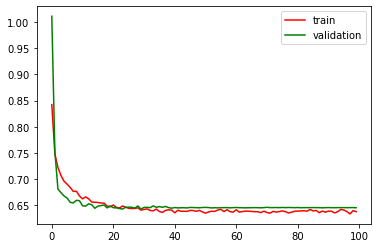

In [ ]:
fig, ax = plt.subplots()
ax.plot(history.history['loss'], color='r')
ax.plot(history.history['val_loss'], color='g')
ax.legend(['train', 'validation'])
fig.savefig(os.path.join(exp_dir, 'loss.png'))

In [5]:
model =result2.trained_model

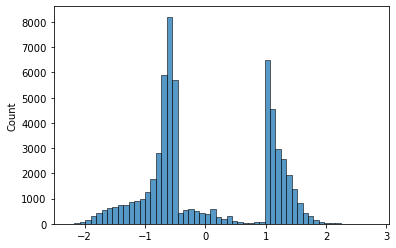

In [6]:
g=sns.histplot(y_f)

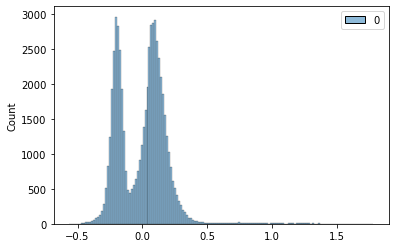

In [7]:
g=sns.histplot(model(X))

<AxesSubplot: ylabel='Count'>

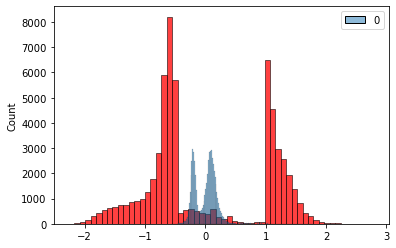

In [8]:
fig, ax = plt.subplots()
sns.histplot(y_f, ax=ax, color = 'r')
sns.histplot(model(X), ax=ax, color ='b')

In [9]:
X_train, X_test, y_f_train, y_f_test, y_p_train, y_p_test = scatter_plots.Kfold_sample(5, 0, X, y)

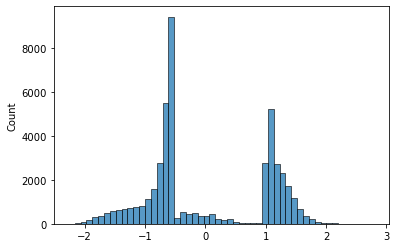

In [10]:
g=sns.histplot(y_f_train)

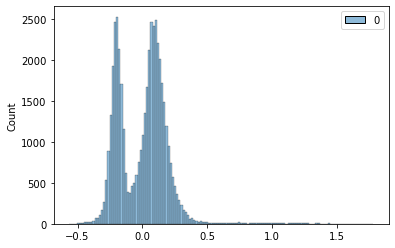

In [11]:
g=sns.histplot(model(X_train))

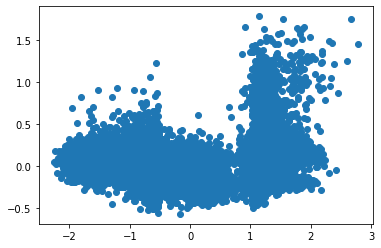

In [12]:
g=plt.scatter(y_f,model(X))

<AxesSubplot: ylabel='Count'>

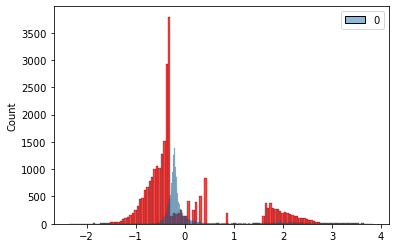

In [ ]:
fig, ax = plt.subplots()
sns.histplot(y_f_train, ax=ax, color = 'r')
sns.histplot(model(X_train), ax=ax, color ='b')

NameError: name 'idx' is not defined

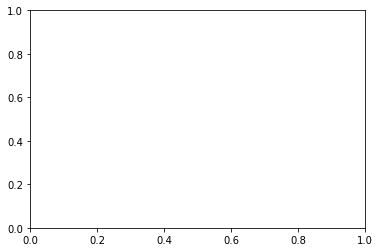

In [ ]:
fig, ax = plt.subplots()
g=sns.histplot(y_f[idx], ax=ax, color = 'r')
sns.histplot(model(X[idx]), ax=ax, color ='b')

<AxesSubplot: ylabel='Count'>

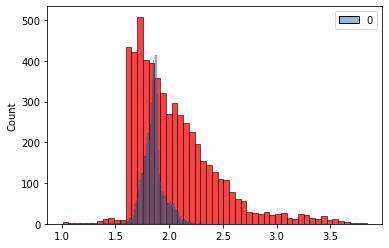

In [ ]:
fig, ax = plt.subplots()
g=sns.histplot(y_f[idx], ax=ax, color = 'r')
sns.histplot(model(X[idx]), ax=ax, color ='b')

<AxesSubplot: ylabel='Count'>

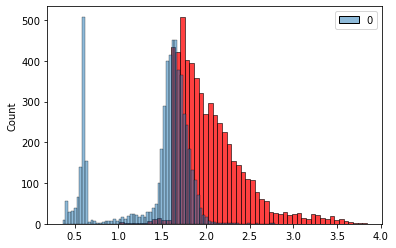

In [ ]:
fig, ax = plt.subplots()
g=sns.histplot(y_f[idx], ax=ax, color = 'r')
sns.histplot(model(X[idx]), ax=ax, color ='b')

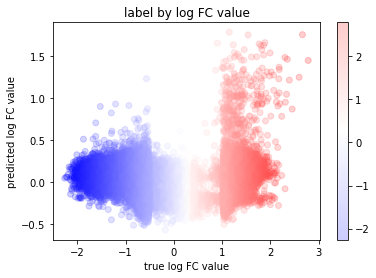

In [13]:
#Train samples classification results (TRAIN)
scatter_plots.Predicted_vs_actual_plot(y_f_train, model(X_train), y_f_train, "log FC" , "log FC", "log FC")

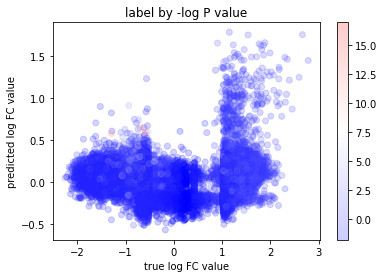

In [14]:
#Train samples classification results (TRAIN) 
scatter_plots.Predicted_vs_actual_plot(y_f_train, model(X_train), y_p_train, "log FC" , "log FC", "-log P")

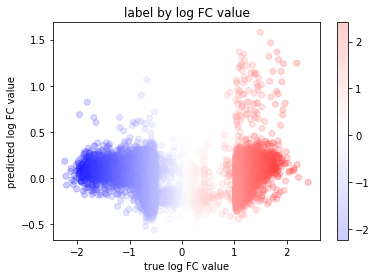

In [15]:
#Train samples classification results (TEST)
scatter_plots.Predicted_vs_actual_plot(y_f_test, model(X_test), y_f_test, "log FC" , "log FC", "log FC")

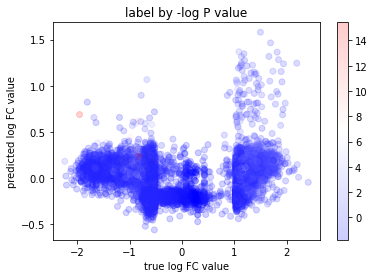

In [16]:
#Train samples classification results (TEST)
scatter_plots.Predicted_vs_actual_plot(y_f_test, model(X_test), y_p_test, "log FC" , "log FC", "-log P")

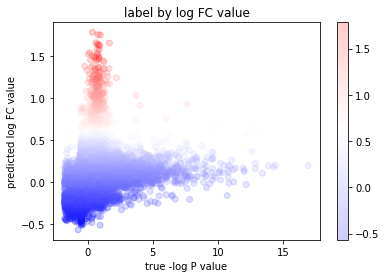

In [17]:
#Train samples classification results 
scatter_plots.Predicted_vs_actual_plot(y_p_train, model(X_train), model(X_train), "-log P" , "log FC", "log FC")

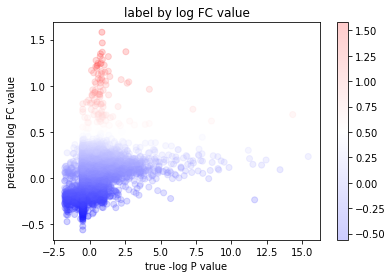

In [18]:
#Train samples classification results
scatter_plots.Predicted_vs_actual_plot(y_p_test, model(X_test), model(X_test), "-log P" , "log FC", "log FC")

In [ ]:
# evaluate accuracy, precision, recall of trianed model
evaluation.single_regression_evaluation(y_f_train, model(X_train),y_f_cutoff)

21407 228 2694 1999
accuracy 0.8890154968094804
precision 0.8976201167489897
recall 0.42595354783720435


Text(0.5, 0, 'log_Fold')

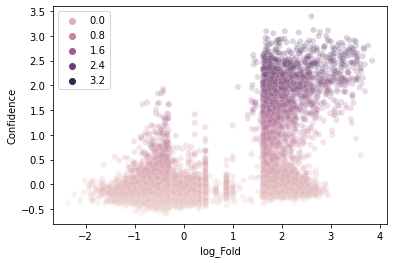

In [ ]:
# confidence analysis
ax = sns.scatterplot(x=y_f_train, y=model(X_train).numpy().reshape(-1), hue=model(X_train).numpy().reshape(-1), alpha=0.2)
ax.set_ylabel('Confidence')
ax.set_xlabel('log_Fold')

In [19]:
embedding=umap.embedding_regression(model,X_train)

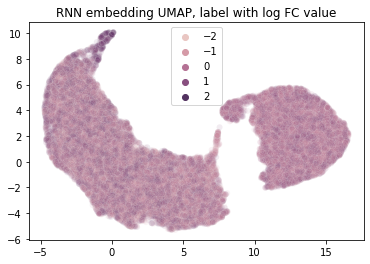

In [20]:
umap.UMAP_log_Fold(embedding, y_f_train)

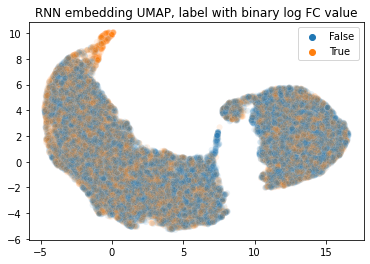

In [23]:
umap.UMAP_binary_log_Fold(embedding, y_f_train, y_f_cutoff)

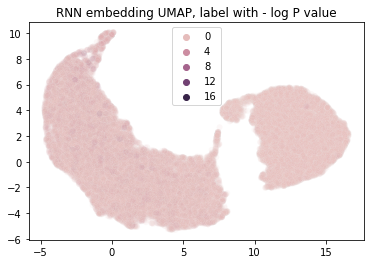

In [24]:
umap.UMAP_log_P(embedding, y_p_train)

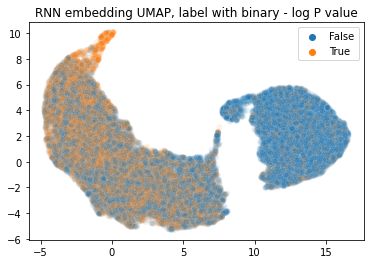

In [25]:
umap.UMAP_binary_log_P(embedding, y_p_train, y_p_cutoff)

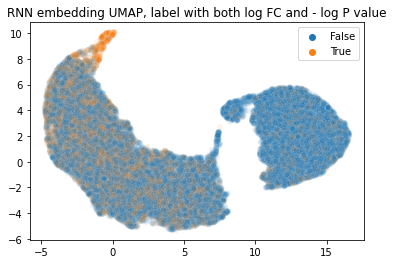

In [26]:
umap.UMAP_joint(embedding, y_f_train, y_f_cutoff, y_p_train, y_p_cutoff)

In [27]:
true_cluster = []
good_seqs = []
for i in range(len(embedding)):
    x1 = embedding[i][0]
    x2 = embedding[i][1]
    if y_f_train[i] > y_f_cutoff:
        if y_p_train[i]> y_p_cutoff:
            if x2 >8:
                true_cluster.append(X_train[i,:,1])
for feature in true_cluster:
    good_seqs.append(RAA_to_seq(feature))

In [28]:
ninemer_seq = []
for seq in good_seqs:
    if len(seq) == 9:
        ninemer_seq.append(seq[1:])

In [31]:
ninemer_seq

['CERFWCNG',
 'FCDWYWCA',
 'FCDGLWCS',
 'CVNWSSCV',
 'FCDLLWCS',
 'FCEWLWCS',
 'CSTFECWW',
 'FGDWFWCS',
 'CEYFSCWW',
 'CTTFMCWW',
 'FWDWFWCA',
 'FCVWFWRS',
 'FCYFFWCS',
 'FCSWFWCS',
 'FCDWLWCA',
 'FWDWLWCS',
 'CYTFACFW',
 'FCDWFECF',
 'YCVWFWCS',
 'CEGYFRCH',
 'FKTFMCWW',
 'CKTSMCWW',
 'FCYWFWCY',
 'FRDWFWCS',
 'LCGLWCHK',
 'FCDWFEYN',
 'CTNFECWW',
 'FCDWFWCP',
 'FCYWFWCA',
 'FCDGFWCS',
 'CKSFMCWW',
 'CKCFMCWW',
 'FCVLFWCS',
 'YCDWVWCS',
 'FCAWFWCS',
 'CESFSCWR',
 'CVSFSCWW',
 'FCEWFWCC',
 'FCDLFWCA',
 'FCAGFWCS',
 'FCPFSFCR',
 'FCDWFLCS',
 'CSSFECFL',
 'FCDCFCCS',
 'FCEWFWCA',
 'FCVWLWCA',
 'CSLRSCVK',
 'CESFKCMV',
 'FCVWSWCS',
 'CETFACWR',
 'FCFWLWCS',
 'FCDWFACN',
 'FCDWCWCA',
 'FCVWLECN',
 'LCVWVWCS',
 'FCDWFRCS',
 'FCVWVLCS',
 'CNTFMCLW',
 'FCVWFWWS',
 'FCDWFEGN',
 'FCVWFCCS',
 'FCVWFECY',
 'FCDWFWCS',
 'CSGFRCFV',
 'FCDLFWFS',
 'CKTFMCWG',
 'FCPWWCSL',
 'CSSFECWW',
 'CETVACWW',
 'FSDWYWCS',
 'FCDCVWCS',
 'FCDWFDCN',
 'FSDWFWCS',
 'VCVWFWCS',
 'FCAWFECN',
 'CLTFMCWW',
 'FCDWFWCA',

In [29]:
Dict_3mer_occ = {}
for tmer in initialize_Proc2Vec_embeddings().keys():
    tmer_good_seqs = [find_3mer(seq, tmer) for seq in good_seqs]
    tmer_occ = np.array(tmer_good_seqs).sum()
    Dict_3mer_occ[tmer] = tmer_occ

sorted_x = sorted(Dict_3mer_occ.items(), key=operator.itemgetter(1))
sorted_x[-15:]

[('AAA', array([-1.74060e-01, -9.57560e-02,  5.95150e-02,  3.96730e-02,
       -3.75934e-01, -1.15415e-01,  9.07250e-02,  1.73422e-01,
        2.92520e-01,  1.90375e-01,  9.40910e-02, -1.97482e-01,
       -1.35202e-01,  7.55210e-02,  1.10771e-01,  4.79090e-02,
       -3.91934e-01,  7.35480e-02,  1.03868e-01, -4.59240e-02,
       -9.53400e-03,  5.56590e-02, -3.08000e-04,  2.15941e-01,
        8.44760e-02,  6.15730e-02,  1.28139e-01,  1.84247e-01,
       -1.00091e-01, -1.26661e-01, -5.72800e-03, -3.82720e-02,
        1.80597e-01, -1.55310e-01,  5.62320e-02, -5.92500e-03,
       -8.53810e-02, -5.69210e-02, -4.55200e-02,  2.65116e-01,
        9.02210e-02, -2.09879e-01,  2.05381e-01,  2.36790e-02,
       -9.29390e-02,  7.27670e-02, -1.05107e-01,  1.11120e-02,
       -1.60518e-01,  4.26270e-02,  1.51230e-01, -1.62708e-01,
       -8.34790e-02, -1.46657e-01,  9.13320e-02,  1.09579e-01,
       -1.01678e-01,  9.11980e-02,  5.51200e-03,  4.73180e-02,
        7.81080e-02,  2.03824e-01, -1.00126e-0

[('CFW', 23),
 ('ACK', 27),
 ('FMC', 32),
 ('MCW', 32),
 ('FCV', 36),
 ('CVW', 40),
 ('FEC', 41),
 ('CWW', 50),
 ('WFW', 63),
 ('DWF', 66),
 ('FWC', 75),
 ('WCS', 91),
 ('CDW', 96),
 ('FCD', 108),
 ('AFC', 192)]

In [30]:
print(sorted_x[-1])
print(sorted_x[-2])
print(sorted_x[-3])
print(sorted_x[-4])
print(sorted_x[-5])

('AFC', 192)
('FCD', 108)
('CDW', 96)
('WCS', 91)
('FWC', 75)


In [2]:
R3_lib = data_loading.read_data_and_preprocess(datafile="12ca5-MDM2-mCDH2-R3.csv")
protein_of_interest = "12ca5"
other_protein = "MDM2"
X, y = data_loading.build_dataset(
    R3_lib,
    protein_of_interest=protein_of_interest,
    other_protein=other_protein,
    dataset_type=data_loading.DATASET_TYPE.JOINT_REGRESSION,
)

 - log P value cutoff is -0.4463856871323837, and log FC value cutoff is 0.6565247891915524


In [3]:
result = experiment.RegressionExperiment().run_adhoc_experiment(
    X, y, rnn.RegressionRNN, load_trained_model=False
)

Epoch 1/50


2023-01-09 05:38:52.735829: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


186/186 [==============================] - 17s 88ms/step - loss: 0.7790 - mse: 0.7790 - val_loss: 0.6682 - val_mse: 0.6682 - lr: 0.0100
Epoch 2/50
186/186 [==============================] - 16s 86ms/step - loss: 0.6842 - mse: 0.6842 - val_loss: 0.6720 - val_mse: 0.6720 - lr: 0.0100
Epoch 3/50
186/186 [==============================] - 17s 92ms/step - loss: 0.6549 - mse: 0.6549 - val_loss: 0.6517 - val_mse: 0.6517 - lr: 0.0100
Epoch 4/50
186/186 [==============================] - 16s 87ms/step - loss: 0.6492 - mse: 0.6492 - val_loss: 0.6913 - val_mse: 0.6913 - lr: 0.0100
Epoch 5/50
186/186 [==============================] - 17s 92ms/step - loss: 0.6561 - mse: 0.6561 - val_loss: 0.6419 - val_mse: 0.6419 - lr: 0.0100
Epoch 6/50
186/186 [==============================] - 17s 89ms/step - loss: 0.6323 - mse: 0.6323 - val_loss: 0.6440 - val_mse: 0.6440 - lr: 0.0090
Epoch 7/50
186/186 [==============================] - 17s 89ms/step - loss: 0.6283 - mse: 0.6283 - val_loss: 0.6552 - val_mse: 0.

In [4]:
y_f_cutoff = 0.6565247891915524
y_p_cutoff = -0.4463856871323837

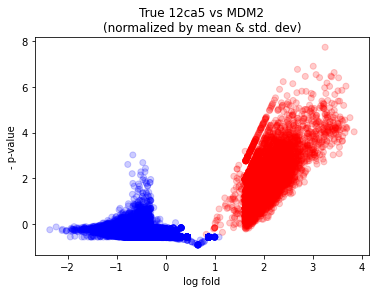

In [5]:
import matplotlib.pyplot as plt

def show_volcano(y, protein_of_interest, other_protein, title_addendum=""):
    plt.title(
        title_addendum
        + protein_of_interest
        + " vs "
        + other_protein
        + "\n(normalized by mean & std. dev)"
    )
    plt.ylabel("- p-value")
    plt.xlabel("log fold")
    plt.scatter(y[:, 1], y[:, 0], c =(y[:, 0]>y_p_cutoff)*(y[:, 1]>y_f_cutoff), cmap='bwr',alpha=0.2)
    plt.show()

show_volcano(
    y, protein_of_interest, other_protein, title_addendum="True "
)

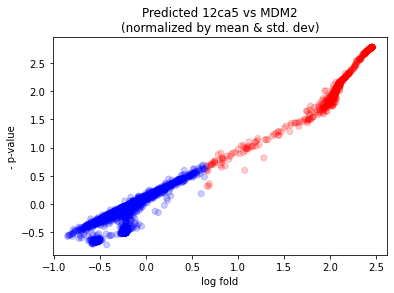

In [7]:
show_volcano(
    np.array(result.y_pred), protein_of_interest, other_protein, title_addendum="Predicted "
)

In [8]:
model =result.trained_model

In [9]:
X_train, X_test, y_f_train, y_f_test, y_p_train, y_p_test = scatter_plots.Kfold_sample(5, 0, X, y)

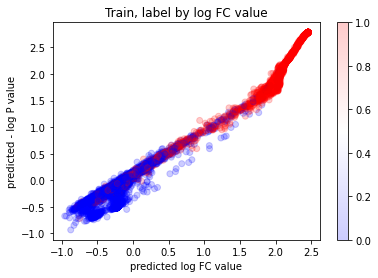

In [10]:
#Train samples classification results 
plt.ylabel("predicted - log P value")
plt.xlabel("predicted log FC value")
plt.scatter(model(X_train)[:,1], model(X_train)[:,0], c=y_f_train> y_f_cutoff, cmap='bwr',alpha=0.2)
plt.title("Train, label by log FC value")
plt.colorbar()
plt.show()

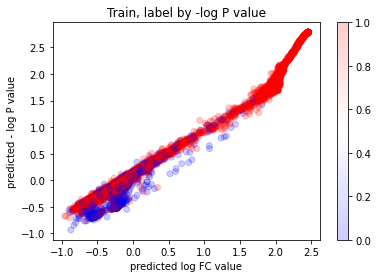

In [11]:
#Train samples classification results 
plt.ylabel("predicted - log P value")
plt.xlabel("predicted log FC value")
plt.scatter(model(X_train)[:,1], model(X_train)[:,0], c=y_p_train>y_p_cutoff, cmap='bwr',alpha=0.2)
plt.title("Train, label by -log P value")
plt.colorbar()
plt.show()

Text(0.5, 0, 'log_Fold')

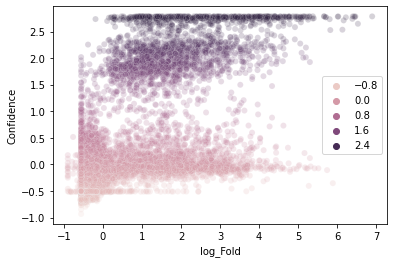

In [12]:
# confidence analysis
ax = sns.scatterplot(x=y_p_train, y=model(X_train)[:,0].numpy().reshape(-1), hue=model(X_train)[:,0].numpy().reshape(-1), alpha=0.2)
ax.set_ylabel('Confidence')
ax.set_xlabel('log_Fold')

Text(0.5, 0, 'log_Fold')

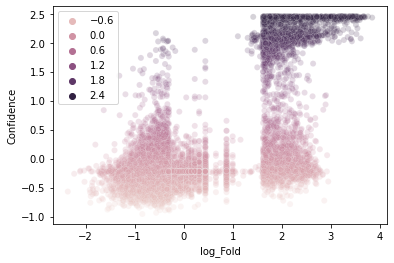

In [13]:
# confidence analysis
ax = sns.scatterplot(x=y_f_train, y=model(X_train)[:,1].numpy().reshape(-1), hue=model(X_train)[:,1].numpy().reshape(-1), alpha=0.2)
ax.set_ylabel('Confidence')
ax.set_xlabel('log_Fold')

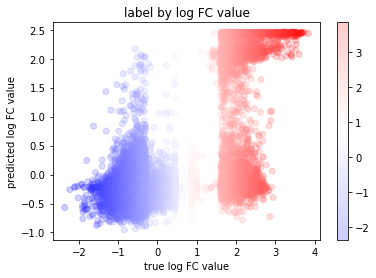

In [19]:
#Train samples classification results (TRAIN)
scatter_plots.Predicted_vs_actual_plot(y_f_train, model(X_train)[:,1], y_f_train, "log FC" , "log FC", "log FC")

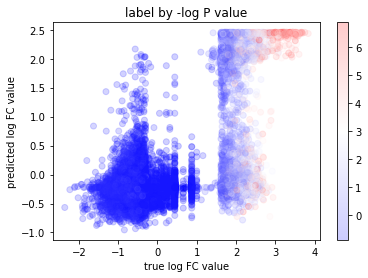

In [20]:
#Train samples classification results (TRAIN) 
scatter_plots.Predicted_vs_actual_plot(y_f_train, model(X_train)[:,1], y_p_train, "log FC" , "log FC", "-log P")

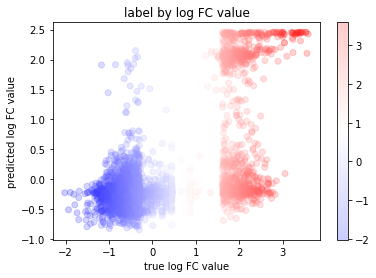

In [21]:
#Train samples classification results (TEST)
scatter_plots.Predicted_vs_actual_plot(y_f_test, model(X_test)[:,1], y_f_test, "log FC" , "log FC", "log FC")

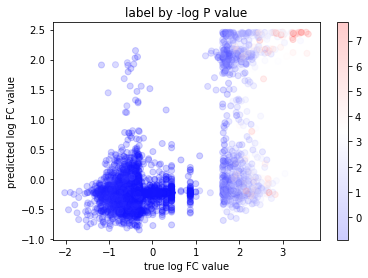

In [22]:
#Train samples classification results (TEST)
scatter_plots.Predicted_vs_actual_plot(y_f_test, model(X_test)[:,1], y_p_test, "log FC" , "log FC", "-log P")

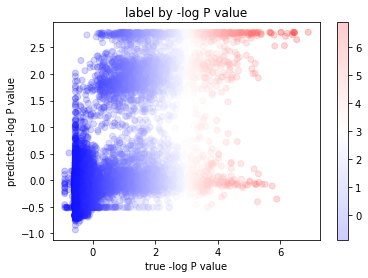

In [23]:
#Train samples classification results 
scatter_plots.Predicted_vs_actual_plot(y_p_train, model(X_train)[:,0], y_p_train, "-log P" , "-log P", "-log P")

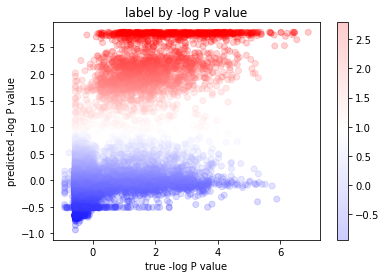

In [24]:
#Train samples classification results 
scatter_plots.Predicted_vs_actual_plot(y_p_train, model(X_train)[:,0],model(X_train)[:,0], "-log P" , "-log P", "-log P")

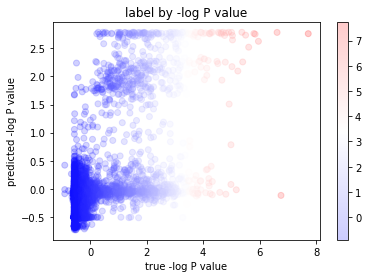

In [25]:
#Train samples classification results 
scatter_plots.Predicted_vs_actual_plot(y_p_test, model(X_test)[:,0], y_p_test, "-log P" , "-log P", "-log P")

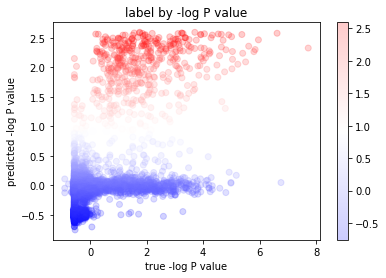

In [20]:
#Train samples classification results 
scatter_plots.Predicted_vs_actual_plot(y_p_test, model(X_test)[:,0], model(X_test)[:,0], "-log P" , "-log P", "-log P")

In [26]:
# evaluate accuracy, precision, recall of trianed model
evaluation.single_regression_evaluation(y_f_train, np.array(model(X_train)[:,1]), y_f_cutoff)

21443 192 2381 2312
accuracy 0.9022713460954117
precision 0.9233226837060703
recall 0.4926486256126145


In [27]:
# evaluate accuracy, precision, recall of trianed model
evaluation.joint_regression_evaluation(y_f_train, np.array(model(X_train)[:,1]), y_f_cutoff,y_p_train, np.array(model(X_train)[:,0]), y_p_cutoff )

21674 182 2165 2307
accuracy 0.9108553631115163
precision 0.9268782643631981
recall 0.5158765652951699


In [23]:
embedding=umap.embedding_classification(model,X_train)

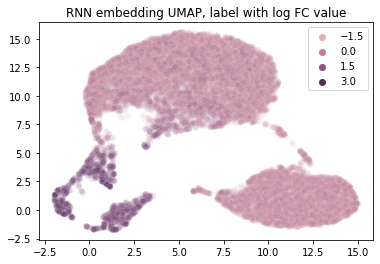

In [24]:
umap.UMAP_log_Fold(embedding, y_f_train)

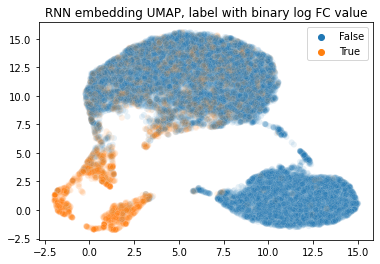

In [25]:
umap.UMAP_binary_log_Fold(embedding, y_f_train, y_f_cutoff)

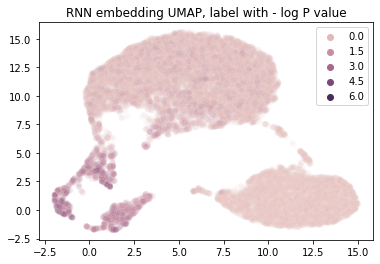

In [26]:
umap.UMAP_log_P(embedding, y_p_train)

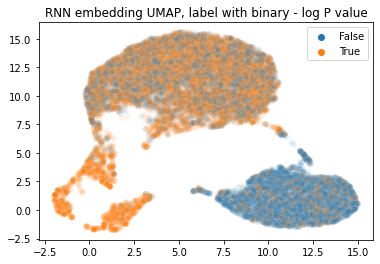

In [27]:
umap.UMAP_binary_log_P(embedding, y_p_train, y_p_cutoff)

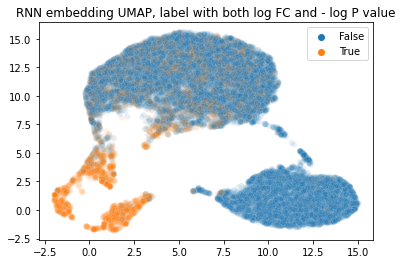

In [28]:
umap.UMAP_joint(embedding,y_f_train, y_f_cutoff, y_p_train,y_p_cutoff)

In [29]:
true_cluster = []
good_seqs = []
for i in range(len(embedding)):
    x1 = embedding[i][0]
    x2 = embedding[i][1]
    if y_f_train[i]>y_f_cutoff:
        if y_p_train[i]> y_p_cutoff:
            if x2 <4.0:
                true_cluster.append(X_train[i,:,1])
for feature in true_cluster:
    good_seqs.append(RAA_to_seq(feature))

In [30]:
ninemer_seq = []
for seq in good_seqs:
    if len(seq) == 9:
        ninemer_seq.append(seq[1:])

In [31]:
Dict_3mer_occ = {}
for tmer in initialize_Proc2Vec_embeddings().keys():
    tmer_good_seqs = [find_3mer(seq, tmer) for seq in good_seqs]
    tmer_occ = np.array(tmer_good_seqs).sum()
    Dict_3mer_occ[tmer] = tmer_occ

sorted_x = sorted(Dict_3mer_occ.items(), key=operator.itemgetter(1))
sorted_x[-15:]

[('AAA', array([-1.74060e-01, -9.57560e-02,  5.95150e-02,  3.96730e-02,
       -3.75934e-01, -1.15415e-01,  9.07250e-02,  1.73422e-01,
        2.92520e-01,  1.90375e-01,  9.40910e-02, -1.97482e-01,
       -1.35202e-01,  7.55210e-02,  1.10771e-01,  4.79090e-02,
       -3.91934e-01,  7.35480e-02,  1.03868e-01, -4.59240e-02,
       -9.53400e-03,  5.56590e-02, -3.08000e-04,  2.15941e-01,
        8.44760e-02,  6.15730e-02,  1.28139e-01,  1.84247e-01,
       -1.00091e-01, -1.26661e-01, -5.72800e-03, -3.82720e-02,
        1.80597e-01, -1.55310e-01,  5.62320e-02, -5.92500e-03,
       -8.53810e-02, -5.69210e-02, -4.55200e-02,  2.65116e-01,
        9.02210e-02, -2.09879e-01,  2.05381e-01,  2.36790e-02,
       -9.29390e-02,  7.27670e-02, -1.05107e-01,  1.11120e-02,
       -1.60518e-01,  4.26270e-02,  1.51230e-01, -1.62708e-01,
       -8.34790e-02, -1.46657e-01,  9.13320e-02,  1.09579e-01,
       -1.01678e-01,  9.11980e-02,  5.51200e-03,  4.73180e-02,
        7.81080e-02,  2.03824e-01, -1.00126e-0

[('EDL', 91),
 ('LRD', 93),
 ('ECR', 94),
 ('PDY', 96),
 ('DLR', 108),
 ('CGD', 109),
 ('AAC', 111),
 ('LGD', 121),
 ('YAA', 124),
 ('RDY', 128),
 ('LEC', 128),
 ('DYS', 163),
 ('YAC', 291),
 ('GDY', 571),
 ('DYA', 596)]

In [32]:
print(sorted_x[-1])
print(sorted_x[-2])
print(sorted_x[-3])
print(sorted_x[-4])
print(sorted_x[-5])

('DYA', 596)
('GDY', 571)
('YAC', 291)
('DYS', 163)
('LEC', 128)


In [11]:
# Load other data libraries 
R3_lib = data_loading.read_data_and_preprocess(datafile="12ca5-MDM2-mCDH2-R3.csv")
R2_lib = data_loading.read_data_and_preprocess(datafile="12ca5-MDM2-mCDH2-R2.csv")
R1_lib = data_loading.read_data_and_preprocess(datafile="12ca5-MDM2-mCDH2-R1.csv")

ImportError: cannot import name 'two_channel_mse' from 'models.rnn' (/Users/yitongtseo/Documents/GitHub/ml_phage_display/./src/models/rnn.py)

<AxesSubplot: xlabel='c_cnt', ylabel='Count'>

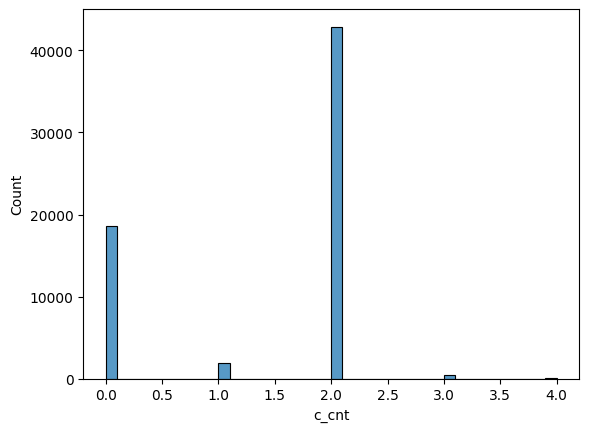

In [9]:
import seaborn as sns
sns.histplot(R3_lib['c_cnt'])

In [10]:
log_ratio_12ca5, _ = data_loading.build_dataset(R3_lib, protein_of_interest='12ca5')
sns.histplot(log_ratio_12ca5[R3_lib.is_dya==True], binwidth=0.2)
plt.title('DYA peptide')

IndexError: list index out of range

In [21]:
sns.histplot(log_ratio_12ca5[R3_lib.is_lle==True], binwidth=0.2, alpha=0.5)
plt.title('LLE peptide')

KeyError: '12ca5_log_ratio'

In [22]:
print((R3_lib.loc[R3_lib.is_lle==True]['12ca5_log_ratio']>0).sum())
print((R3_lib.loc[R3_lib.is_lle==True]['12ca5_log_ratio']<=0).sum())

KeyError: '12ca5_log_ratio'

Text(0.5, 1.0, 'all peptide')

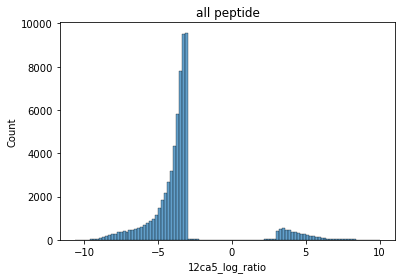

In [ ]:
sns.histplot(R3_lib['12ca5_log_ratio'], binwidth=0.2, alpha=0.7)
plt.title('all peptide')
# sns.histplot(R3_lib.loc[R3_lib.is_dya==True]['12ca5_log_ratio'], binwidth=0.2)

In [ ]:
print(acc)
print(pre)
print(rec)

[0.6483550832226304, 0.6542158318355865, 0.6634104407627384, 0.6598937167864958, 0.6517661769302907]
[0.6417112299465241, 0.6702702702702703, 0.6440677966101694, 0.7009803921568627, 0.751937984496124]
[0.026356248627278717, 0.027629233511586453, 0.026158788435061954, 0.03225078935498421, 0.021455430214554302]


In [ ]:
print(np.array(acc).mean(), np.array(acc).var())
print(np.array(pre).mean(), np.array(pre).var())
print(np.array(rec).mean(), np.array(rec).var())

0.6555282499075484 2.9703237664053927e-05
0.6817935346959902 0.0016901974856322836
0.026770098028693123 1.1913351182601678e-05


In [ ]:
# get the 4th fold because the 4th model showed the best precision
# actually unnecessary, can just use whatever fold
kf = KFold(n_splits=2)
i = 0
y_reg = np.array(list(y_reg))
for train_index, test_index in kf.split(X):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]
    y_reg_train, y_reg_test = y_reg[train_index], y_reg[test_index]
    if i==0:
        break
    i += 1

In [ ]:
embedding = reducer.fit_transform(nn_emb)

Text(0.5, 1.0, 'MDM2 RNN embedding UMAP')

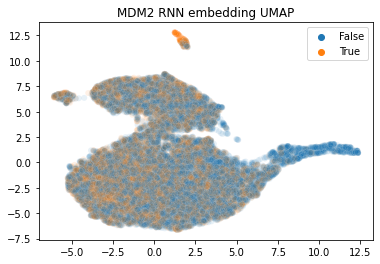

In [ ]:
# tests
ax = sns.scatterplot(
    x=embedding[:, 0],
    y=embedding[:, 1],
    hue=y_train, alpha=0.1)
plt.title("MDM2 RNN embedding UMAP")

Text(0.5, 1.0, 'MDM2 RNN embedding UMAP')

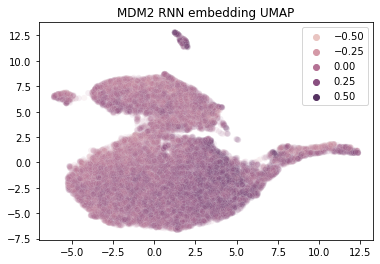

In [ ]:
# tests
X_train_prop1 = X_train[:,:,2].mean(-1)
ax = sns.scatterplot(
    x=embedding[:, 0],
    y=embedding[:, 1],
    hue=X_train_prop1, alpha=0.1)
plt.title("MDM2 RNN embedding UMAP")

Text(0.5, 1.0, 'MDM2 RNN embedding UMAP')

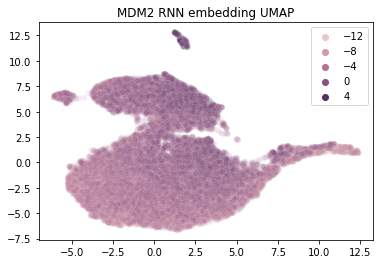

In [ ]:
# color by volume of side chain
X_train_prop2 = X_train[:,:,10].sum(-1)#.sum(-1)
ax = sns.scatterplot(
    x=embedding[:, 0],
    y=embedding[:, 1],
    hue=X_train_prop2, alpha=0.1)
plt.title("MDM2 RNN embedding UMAP")

Text(0.5, 1.0, 'MDM2 RNN embedding UMAP')

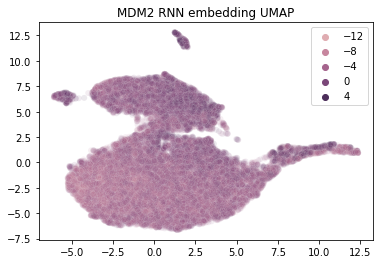

In [ ]:
# color by SASA
X_train_prop2 = X_train[:,:,9].sum(-1)#.sum(-1)
ax = sns.scatterplot(
    x=embedding[:, 0],
    y=embedding[:, 1],
    hue=X_train_prop2, alpha=0.1)
plt.title("MDM2 RNN embedding UMAP")

Text(0.5, 1.0, 'MDM2 RNN embedding UMAP')

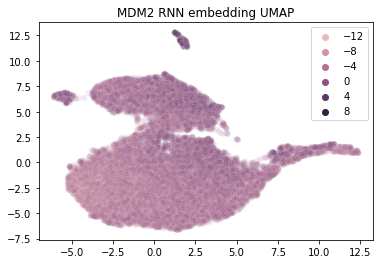

In [ ]:
# color by polarizability
X_train_prop2 = X_train[:,:,8].sum(-1)
ax = sns.scatterplot(
    x=embedding[:, 0],
    y=embedding[:, 1],
    hue=X_train_prop2, alpha=0.1)
plt.title("MDM2 RNN embedding UMAP")

In [ ]:
# write results
with open('mdm2_good.txt','w') as fh:
    for i in range(len(ls)):
        fh.write(f'{ls[i]}\n')

In [ ]:
true_cluster = []
good_seqs = []
for i in range(len(embedding)):
    x1 = embedding[i][0]
    x2 = embedding[i][1]
    if y_train[i] == 1:
        if x2 > 10.0:
            true_cluster.append(X_train[i,:,1])
for feature in true_cluster:
    good_seqs.append(RAA_to_seq(feature))

In [ ]:
good_seqs

['AFCDWFACY',
 'ACKPFMCWW',
 'AFCDWFKCN',
 'AFCDWYCCS',
 'ACSCFECFW',
 'AYCVWVWCS',
 'AFCDWLWCS',
 'AFCDRFWCS',
 'AFCYWCWCS',
 'AFCDGLWCS',
 'WSLNSGMFGYQW',
 'AFCDCVWCS',
 'AFCDCFLCS',
 'AFWDWFWCA',
 'ACVSFECFW',
 'AFCDWYECN',
 'ALCGFWFCD',
 'AFCVWFECY',
 'AFFDWFWCS',
 'ACECFSCWW',
 'ACSTFECWW',
 'ACKCFMCWW',
 'AYCYWFWCS',
 'ACMTFMCWC',
 'ACCDWFWCS',
 'AFKTFMCWW',
 'AFCFWFWCS',
 'ACDSFSCWW',
 'AFCDYFYCS',
 'AVCFLEWCS',
 'ALCVWVWCS',
 'AFCWFDSCQ',
 'AFCYLFWCS',
 'AFCDLFWCD',
 'ACETFMCWW',
 'AFCDWLWCP',
 'AYCVWFWCS',
 'AYCDWFECN',
 'ACMTFMCWW',
 'ACSTFEWFW',
 'AFFDCFWCS',
 'AFFAWFWCS',
 'AFCAWFWWS',
 'ACKTFLCWW',
 'AFCVWVWCC',
 'ACKTFMFWW',
 'ACTTFEWWW',
 'AFCVWFLCC',
 'AFCDWFVCY',
 'AFCVWFWRS',
 'ACYTFMCWW',
 'AFCYWVWCS',
 'AFCDWYWCS',
 'AYCDWFECN',
 'AFCVWVWGS',
 'AFCAWFWCS',
 'AFCDWVWCS',
 'ACWWWSYCS',
 'AFCVWVWCS',
 'AFWVWFWCS',
 'AFCDWFESN',
 'AFCVRFWCS',
 'ACYTFMCWW',
 'AFCDGVWCS',
 'AFCYWLWCS',
 'ALCDWFWCS',
 'AFCVWFWCS',
 'AFCDWFECY',
 'ACSPFECFW',
 'AFFFWFWCS',
 'AFCDWSWCS',
 'A

Text(0.5, 1.0, 'MDM2 RNN embedding UMAP')

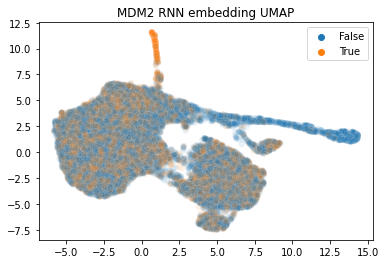

In [ ]:
ax = sns.scatterplot(
    x=embedding[:, 0],
    y=embedding[:, 1],
    hue=y_train, alpha=0.1)
plt.title("MDM2 RNN embedding UMAP")

In [ ]:
y_pred = model(X_train)

Text(0.5, 0, 'MDM2_log_ratio')

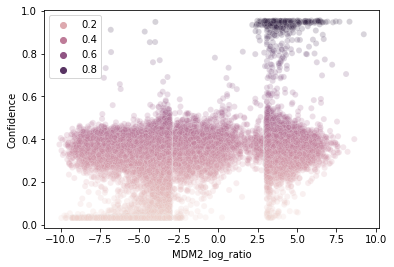

In [ ]:
# colored by predicted confidence
ax = sns.scatterplot(x=y_mdm2_reg_train, y=y_pred.numpy().reshape(-1), hue=y_pred.numpy().reshape(-1), alpha=0.2)
ax.set_ylabel('Confidence')
ax.set_xlabel('MDM2_log_ratio')

Text(0.5, 0, 'MDM2_log_ratio')

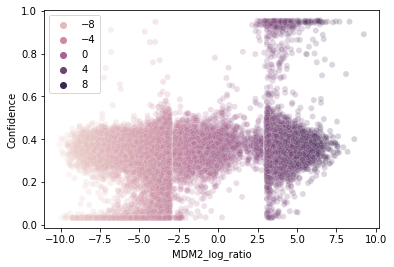

In [ ]:
# colored by true log ratio 
ax = sns.scatterplot(x=y_reg_train, y=y_pred.numpy().reshape(-1), hue=y_reg_train, alpha=0.2)
ax.set_ylabel('Confidence')
ax.set_xlabel('MDM2_log_ratio')

Text(0.5, 1.0, 'MDM2 RNN embedding UMAP')

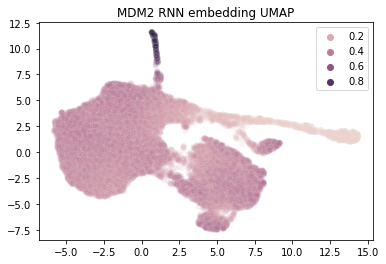

In [ ]:
# colored by predicted confidence
ax = sns.scatterplot(
    x=embedding[:, 0],
    y=embedding[:, 1],
    hue=y_pred.numpy().reshape(-1), alpha=0.1)
plt.title("MDM2 RNN embedding UMAP")

In [ ]:
true_cluster = []
good_seqs = []
for i in range(len(embedding)):
    x1 = embedding[i][0]
    x2 = embedding[i][1]
    if y_train[i] == 0:
        if x1 > 10.0:
            true_cluster.append(X_train[i,:,1])
for feature in true_cluster:
    good_seqs.append(RAA_to_seq(feature))

In [ ]:
len(good_seqs)

1133

In [ ]:
good_seqs

['AVCGDYAEC',
 'KDVFRDY',
 'ACLGDYACR',
 'ACVGDYAAC',
 'DYPDYAD',
 'MADSPDY',
 'ACYGDYACF',
 'AGCGDYAAG',
 'DWGDYAL',
 'AHCYGDYAC',
 'DDYLDYS',
 'ACWDYACYV',
 'ACWEGEYAC',
 'KVELRDY',
 'AFCLGDYSC',
 'NEDLMDY',
 'AECGDYAEC',
 'AYCFGDYSC',
 'ACLGDYSHC',
 'ACFDADYSEC',
 'ADCYGDYAC',
 'AKCWGDYAC',
 'AQCFGDYAC',
 'ALCGDYSAC',
 'ACGDYAVVC',
 'ACVVDYACW',
 'ACMGDYASC',
 'KDDLWDY',
 'NEDLLYY',
 'TADMPDY',
 'ACYCDYACA',
 'MKDVVDY',
 'DARDYAG',
 'KEDLSYY',
 'AGWMTWCEE',
 'ACYVDYAAC',
 'ARCVGDYGC',
 'LMDWPDY',
 'AHCGDYAEC',
 'AVWWGDYAC',
 'ASCVGDYSC',
 'DEKDYAA',
 'KVDLGDF',
 'ACYGDYAGC',
 'DLYDYAH',
 'SEVYDYS',
 'ACAADLRDY',
 'AGCYGDYDC',
 'ADRRDYA',
 'ARCVGDYAF',
 'ATCVGDYAC',
 'DTMDYAY',
 'ACTGDYAWC',
 'ACNFDYACW',
 'ALCSGDYAC',
 'ACFADYACL',
 'ACNLPWCEE',
 'RLDKPDY',
 'LADLHDY',
 'AFCVGDYAC',
 'ACLGDYACK',
 'HAVGFDY',
 'AKCFGDYAW',
 'ACAADMRDY',
 'AHCDVMDYG',
 'AFCLGEYAC',
 'ACVGDYAGC',
 'AAWGDYAAC',
 'ACYGDYACY',
 'QHDYPDY',
 'SDTGDYA',
 'ACGMTWCEE',
 'ARCYGDYDC',
 'APCADYACW',
 'ACCFDLGDY',

In [ ]:
ninemer_seq = []
for seq in good_seqs:
    if len(seq) == 9:
        ninemer_seq.append(seq[1:])

In [ ]:
for seq in ninemer_seq:
    print(seq)

VCGDYAEC
CLGDYACR
CVGDYAAC
CYGDYACF
GCGDYAAG
HCYGDYAC
CWDYACYV
CWEGEYAC
FCLGDYSC
ECGDYAEC
YCFGDYSC
CLGDYSHC
DCYGDYAC
KCWGDYAC
QCFGDYAC
LCGDYSAC
CGDYAVVC
CVVDYACW
CMGDYASC
CYCDYACA
GWMTWCEE
CYVDYAAC
RCVGDYGC
HCGDYAEC
VWWGDYAC
SCVGDYSC
CYGDYAGC
CAADLRDY
GCYGDYDC
RCVGDYAF
TCVGDYAC
CTGDYAWC
CNFDYACW
LCSGDYAC
CFADYACL
CNLPWCEE
FCVGDYAC
CLGDYACK
KCFGDYAW
CAADMRDY
HCDVMDYG
FCLGEYAC
CVGDYAGC
AWGDYAAC
CYGDYACY
CGMTWCEE
RCYGDYDC
PCADYACW
CCFDLGDY
CNGDYAAF
GGLGDYAR
GCWGDYAG
DCGGYCGY
VCWGDYEC
CPCDYAAC
RCAGDYAC
CVWRWCEE
LCQGDYAC
CRATWWEE
CVGDYACA
QCYGDYSC
CVFTFCEE
CWLTWCEE
PCGDYAAC
CLGYYAAC
YCVGDYAC
CVGDYACP
VCWGDYVC
RCWDYACY
ACFGDYAW
ACFGDYAF
CWWTWCEE
CCDYAAYC
CTGDYAAC
LCYGDYAC
CFGDYASC
VCGGDYAC
GCYGDYVC
CRGDFAAC
RCYWDYAC
GCVGDYAW
VCLGDYAG
HCGDYSAC
CPDYAACF
CWDGEYAC
CWMTWGEE
LCFCDYAC
MCWGDYAC
CFGYAAYC
LCFGDYAG
CPGDYSTC
MCYGDYSC
CYGDYASC
YCFGDYAW
CYGYYAAC
CAADRLDY
CSVDYAAC
CVGDYACS
LCGDYAAC
FCHGDYAF
GWLGDYAG
ACYGDYAC
CWMRWCEE
ECLGDYAR
CYFTWCEE
WRGDYAMC
CWLRWCEE
CYGDYACR
RCVGDYSC
CGDYSATC
GCYGDYEC
G

In [ ]:
y = R3_lib['12ca5_log_ratio']
y = np.array(list(y.apply(lambda e: e > 0)))
X, y = shuffle(nn_x, y, random_state=0)

In [ ]:
models = []
kf = KFold(n_splits=5)
acc, pre, rec = [], [], []
for train_index, test_index in kf.split(X):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]
    model = create_model()
    model.fit(
        x=X_train,
        y=y_train,
        batch_size=128,
        epochs=16,
        verbose='auto',
        validation_split=0.1,
        initial_epoch=0,
        class_weight={1:0.8, 0:0.2},
        validation_freq=1,
        use_multiprocessing=False)
    
    y_pred = model(X_test)
    y_pred = y_pred.numpy().reshape(-1) >= 0.5
    tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()

    print(tn, fp, fn, tp)
    print("accuracy", (tn+tp)/(tn+fp+fn+tp))
    acc.append((tn+tp)/(tn+fp+fn+tp))
    print("precision", tp/(tp+fp))
    pre.append(tp/(tp+fp))
    print("recall", tp/(tp+fn))
    rec.append(tp/(tp+fn))
    models.append(model)

# do not trust the accuracy score here, it was wrongly implemented before (it's fine now)

Epoch 1/16
360/360 [==============================] - 7s 10ms/step - loss: 0.1145 - accuracy: 0.9132 - recall_6: 0.3721 - precision_6: 0.5076 - val_loss: 0.2706 - val_accuracy: 0.9271 - val_recall_6: 0.4262 - val_precision_6: 0.6788
Epoch 2/16
360/360 [==============================] - 3s 8ms/step - loss: 0.1006 - accuracy: 0.9287 - recall_6: 0.4497 - precision_6: 0.6320 - val_loss: 0.2840 - val_accuracy: 0.9265 - val_recall_6: 0.4699 - val_precision_6: 0.6513
Epoch 3/16
360/360 [==============================] - 3s 8ms/step - loss: 0.0973 - accuracy: 0.9339 - recall_6: 0.4536 - precision_6: 0.6873 - val_loss: 0.2818 - val_accuracy: 0.9269 - val_recall_6: 0.4719 - val_precision_6: 0.6542
Epoch 4/16
360/360 [==============================] - 3s 8ms/step - loss: 0.0956 - accuracy: 0.9372 - recall_6: 0.4606 - precision_6: 0.7238 - val_loss: 0.2607 - val_accuracy: 0.9375 - val_recall_6: 0.4699 - val_precision_6: 0.7766
Epoch 5/16
360/360 [==============================] - 3s 8ms/step - los

In [ ]:
kf = KFold(n_splits=5)
acc, pre, rec = [], [], []
i = 0
for train_index, test_index in kf.split(X):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]
    model = models[i]
    y_pred = model(X_test)
    y_pred = y_pred.numpy().reshape(-1) >= 0.5
    tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
    print(tn, fp, fn, tp)
    print("accuracy", (tn+tp)/(tn+fp+fn+tp))
    acc.append((tn+tp)/(tn+fp+fn+tp))
    print("precision", tp/(tp+fp))
    pre.append(tp/(tp+fp))
    print("recall", tp/(tp+fn))
    rec.append(tp/(tp+fn))
    
    i+=1
    if i==5:
        break

11626 85 592 494
accuracy 0.9470969758537157
precision 0.853195164075993
recall 0.4548802946593002
11468 173 602 554
accuracy 0.939438930999453
precision 0.7620357634112792
recall 0.47923875432525953
11493 200 597 506
accuracy 0.9377149109096593
precision 0.71671388101983
recall 0.4587488667271079
11566 72 638 520
accuracy 0.9445139105970616
precision 0.8783783783783784
recall 0.44905008635578586
11518 169 588 521
accuracy 0.9408408877774305
precision 0.755072463768116
recall 0.4697926059513075


In [ ]:
print(np.array(acc).mean(), np.array(acc).var())
print(np.array(pre).mean(), np.array(pre).var())
print(np.array(rec).mean(), np.array(rec).var())

0.9419211232274639 1.170648113987608e-05
0.7930791301307194 0.003825949573193828
0.46234212160375215 0.00011725489146586728


Text(0.5, 0, '12ca5_log_ratio')

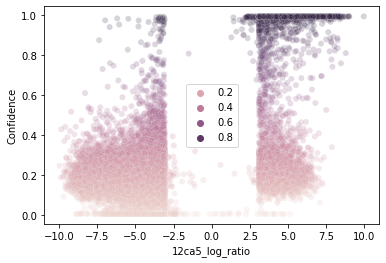

In [ ]:
# confidence analysis
ax = sns.scatterplot(x=y_12ca5_reg_train, y=y_pred.numpy().reshape(-1), hue=y_pred.numpy().reshape(-1), alpha=0.2)
ax.set_ylabel('Confidence')
ax.set_xlabel('12ca5_log_ratio')

In [ ]:
model = models[3] # third model showed the best precision
y_pred = model(X_train)

In [ ]:
kf = KFold(n_splits=5)
i = 0
for train_index, test_index in kf.split(X):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]
    if i==3:
        break
    i += 1

In [ ]:
nn_emb = model.layers[2](model.layers[1](model.layers[0](X_train)))
reducer = umap.UMAP(n_neighbors=10,
                    min_dist=0.1,
                    n_components=2)

In [ ]:
embedding = reducer.fit_transform(nn_emb)

Text(0.5, 1.0, '12ca5 RNN embedding UMAP')

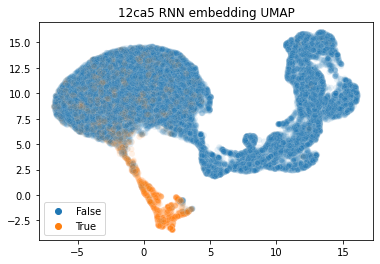

In [ ]:
ax = sns.scatterplot(
    x=embedding[:, 0],
    y=embedding[:, 1],
    hue=y_train, alpha=0.1)
plt.title("12ca5 RNN embedding UMAP")

In [ ]:
true_cluster = []
good_seqs = []
for i in range(len(embedding)):
    x1 = embedding[i][0]
    x2 = embedding[i][1]
    if y_train[i] == 1:
        if x2 < 1.2:
            true_cluster.append(X_train[i,:,1])
for feature in true_cluster:
    good_seqs.append(RAA_to_seq(feature))

In [ ]:
ninemer_seq = []
for seq in ninemer_seqs:
    if len(seq) == 9:
        ninemer_seq.append(seq[1:]) # exclude 'A' in position 0 

In [ ]:
len(good_seqs)

1689

In [ ]:
# write results
with open('12ca5_good.txt','w') as fh:
    for i in range(len(ls)):
        fh.write(f'{ls[i]}\n')

In [ ]:
good_seqs

['AFCLGDFAC',
 'AHCTDRRDY',
 'AVCGDYAEC',
 'KDVFRDY',
 'ACLGDYACR',
 'ACVGDYAAC',
 'DYPDYAD',
 'MADSPDY',
 'ACYGDYACF',
 'AGCGDYAAG',
 'DWGDYAL',
 'KVDFRVY',
 'AHCYGDYAC',
 'DDYLDYS',
 'ACWEGEYAC',
 'KVELRDY',
 'AFCLGDYSC',
 'NEDLMDY',
 'YDNPDYS',
 'AECGDYAEC',
 'AYCFGDYSC',
 'ACLGDYSHC',
 'ACFDADYSEC',
 'ADCYGDYAC',
 'AKCWGDYAC',
 'ARCVGVYAC',
 'AQCFGDYAC',
 'ALCGDYSAC',
 'AGCRMLECR',
 'LVDLRVY',
 'ACGDYAVVC',
 'ACVVDYACW',
 'SNVYDYS',
 'ACMGDYASC',
 'AVCTYLECK',
 'KDDLWDY',
 'NEDLLYY',
 'TADMPDY',
 'ATCLDYACW',
 'APCFHLEWR',
 'APCFHLECR',
 'MKDVVDY',
 'ACNFSLCEE',
 'DARDYAG',
 'KEDLSYY',
 'AGWMTWCEE',
 'ACYVDYAAC',
 'ARCVGDYGC',
 'LMDWPDY',
 'AHCGDYAEC',
 'AVWWGDYAC',
 'ASCVGDYSC',
 'DEKDYAA',
 'AKCWGDFAC',
 'KVDLGDF',
 'ACSYTWWEE',
 'ACYGDYAGC',
 'ACSGYYAAC',
 'ACWVYACME',
 'AVCFHLECR',
 'DLYDYAH',
 'AVCSMLECK',
 'SEVYDYS',
 'ACAADLRDY',
 'DVPDYAM',
 'AGCYGDYDC',
 'ADRRDYA',
 'ARCVGDYAF',
 'ATCVGDYAC',
 'DTMDYAY',
 'ACTGDYAWC',
 'MLDLLYV',
 'ACNFDYACW',
 'ALCSGDYAC',
 'ACFADYACL',
 

In [ ]:
for seq in ninemer_seq:
    print(seq)

FCLGDFAC
HCTDRRDY
VCGDYAEC
CLGDYACR
CVGDYAAC
CYGDYACF
GCGDYAAG
HCYGDYAC
CWEGEYAC
FCLGDYSC
ECGDYAEC
YCFGDYSC
CLGDYSHC
DCYGDYAC
KCWGDYAC
RCVGVYAC
QCFGDYAC
LCGDYSAC
GCRMLECR
CGDYAVVC
CVVDYACW
CMGDYASC
VCTYLECK
TCLDYACW
PCFHLEWR
PCFHLECR
CNFSLCEE
GWMTWCEE
CYVDYAAC
RCVGDYGC
HCGDYAEC
VWWGDYAC
SCVGDYSC
KCWGDFAC
CSYTWWEE
CYGDYAGC
CSGYYAAC
CWVYACME
VCFHLECR
VCSMLECK
CAADLRDY
GCYGDYDC
RCVGDYAF
TCVGDYAC
CTGDYAWC
CNFDYACW
LCSGDYAC
CFADYACL
CWDYACWP
CNLPWCEE
GCPMLECK
CRSTWCEE
FCVGDYAC
CLGDYACK
VCPMLECQ
TCFLLECK
KCFGDYAW
CAADMRDY
HCDVMDYG
PCTLMECR
FCLGEYAC
CQHTSCEE
CVGDYAGC
AWGDYAAC
CYGDYACY
CGMTWCEE
RCYGDYDC
PCADYACW
CCFDLGDY
CNGDYAAF
GGLGDYAR
CVGDSACQ
SCFVYACW
GCWGDYAG
HCFHLECR
TCFHLECR
NCTLLECR
YCTLLECR
VCWGDYEC
CPCDYAAC
PCLLLECK
RCAGDYAC
CVWRWCEE
LCQGDYAC
CFAYQCEE
CRATWWEE
CVGDYACA
QCYGDYSC
CVFTFCEE
CWLTWCEE
CSNTLCEE
PCGDYAAC
GCLGDFAC
CLGYYAAC
YCVGDYAC
CVGDYACP
VCWGDYVC
ACFGDYAW
ACFGDYAF
VCPMLECR
CWWTWCEE
CTGDYAAC
LCYGDYAC
CFGDYASC
VCGGDYAC
CFGVYAAC
GCYGDYVC
CDYADQSC
QCFMLECR
CSNTGCEE
RCYWDYAC
C